In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('./full_merged.csv')
df.head()

measure_datetime  water_level  temperature_2m  rain  showers  \
0  2019-01-01 00:00:00     0.621667            23.5   0.0      0.0   
1  2019-01-01 01:00:00     0.723333            22.7   0.0      0.0   
2  2019-01-01 02:00:00     0.713333            22.0   0.0      0.0   
3  2019-01-01 03:00:00     0.695000            21.4   0.0      0.0   
4  2019-01-01 04:00:00     0.633333            20.7   0.0      0.0   

   cloud_cover  relative_humidity_2m  dew_point_2m  precipitation  \
0            2                    65          16.6            0.0   
1            1                    68          16.4            0.0   
2            2                    75          17.3            0.0   
3            2                    80          17.8            0.0   
4            1                    86          18.3            0.0   

   weather_code  pressure_msl  surface_pressure  wind_speed_10m  \
0             0        1017.1            1017.0             6.9   
1             0        1016.7            1016.6             6.6   
2             0        1016.5            1016.4             6.0   
3             0        1016.1            1016.0             5.3   
4             0        1015.8            1015.7             7.2   

   wind_direction_10m  wind_gusts_10m  et0_fao_evapotranspiration  \
0                  43            11.2                        0.03   
1                  22            10.8                        0.02   
2                  25            10.4                        0.01   
3                  28             9.4                        0.00   
4                  18             8.6                        0.00   

   river_discharge  
0      1131.400000  
1      1131.727083  
2      1132.054167  
3      1132.381250  
4      1132.708333

In [3]:
# Set the datetime index
df['date'] = pd.to_datetime(df['measure_datetime'])
df.drop(columns=['measure_datetime'], inplace=True)
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df.head()

water_level  temperature_2m  rain  showers  cloud_cover  \
date                                                                           
2019-01-01 00:00:00     0.621667            23.5   0.0      0.0            2   
2019-01-01 01:00:00     0.723333            22.7   0.0      0.0            1   
2019-01-01 02:00:00     0.713333            22.0   0.0      0.0            2   
2019-01-01 03:00:00     0.695000            21.4   0.0      0.0            2   
2019-01-01 04:00:00     0.633333            20.7   0.0      0.0            1   

                     relative_humidity_2m  dew_point_2m  precipitation  \
date                                                                     
2019-01-01 00:00:00                    65          16.6            0.0   
2019-01-01 01:00:00                    68          16.4            0.0   
2019-01-01 02:00:00                    75          17.3            0.0   
2019-01-01 03:00:00                    80          17.8            0.0   
2019-01-01 04:00:00                    86          18.3            0.0   

                     weather_code  pressure_msl  surface_pressure  \
date                                                                
2019-01-01 00:00:00             0        1017.1            1017.0   
2019-01-01 01:00:00             0        1016.7            1016.6   
2019-01-01 02:00:00             0        1016.5            1016.4   
2019-01-01 03:00:00             0        1016.1            1016.0   
2019-01-01 04:00:00             0        1015.8            1015.7   

                     wind_speed_10m  wind_direction_10m  wind_gusts_10m  \
date                                                                      
2019-01-01 00:00:00             6.9                  43            11.2   
2019-01-01 01:00:00             6.6                  22            10.8   
2019-01-01 02:00:00             6.0                  25            10.4   
2019-01-01 03:00:00             5.3                  28             9.4   
2019-01-01 04:00:00             7.2                  18             8.6   

                     et0_fao_evapotranspiration  river_discharge  
date                                                              
2019-01-01 00:00:00                        0.03      1131.400000  
2019-01-01 01:00:00                        0.02      1131.727083  
2019-01-01 02:00:00                        0.01      1132.054167  
2019-01-01 03:00:00                        0.00      1132.381250  
2019-01-01 04:00:00                        0.00      1132.708333

In [4]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56232 entries, 2019-01-01 00:00:00 to 2025-05-31 23:00:00
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   water_level                 56232 non-null  float64
 1   temperature_2m              56232 non-null  float64
 2   rain                        56232 non-null  float64
 3   showers                     56232 non-null  float64
 4   cloud_cover                 56232 non-null  int64  
 5   relative_humidity_2m        56232 non-null  int64  
 6   dew_point_2m                56232 non-null  float64
 7   precipitation               56232 non-null  float64
 8   weather_code                56232 non-null  int64  
 9   pressure_msl                56232 non-null  float64
 10  surface_pressure            56232 non-null  float64
 11  wind_speed_10m              56232 non-null  float64
 12  wind_direction_10m          56232 non-null  int64  
 

In [5]:
# Describe the dataset
df.describe()

water_level  temperature_2m          rain  showers   cloud_cover  \
count  56232.000000    56232.000000  56232.000000  56232.0  56232.000000   
mean       0.390225       28.193141      0.179494      0.0     69.235524   
std        0.690438        2.980016      0.797400      0.0     36.774707   
min       -9.376667       15.400000      0.000000      0.0      0.000000   
25%       -0.086667       26.300000      0.000000      0.0     35.000000   
50%        0.508333       28.100000      0.000000      0.0     91.000000   
75%        0.901667       30.200000      0.000000      0.0    100.000000   
max        4.853333       38.700000     22.100000      0.0    100.000000   

       relative_humidity_2m  dew_point_2m  precipitation  weather_code  \
count          56232.000000  56232.000000   56232.000000  56232.000000   
mean              74.350494     22.830203       0.179494     12.820102   
std               14.614136      3.056060       0.797400     21.162602   
min               17.000000      5.700000       0.000000      0.000000   
25%               65.000000     22.000000       0.000000      1.000000   
50%               77.000000     23.900000       0.000000      3.000000   
75%               86.000000     24.800000       0.000000      3.000000   
max              100.000000     28.100000      22.100000     65.000000   

       pressure_msl  surface_pressure  wind_speed_10m  wind_direction_10m  \
count  56232.000000      56232.000000    56232.000000        56232.000000   
mean    1009.349577       1009.249577        9.426142          180.359386   
std        3.050357          3.050357        4.546150           91.862950   
min      999.200000        999.100000        0.000000            1.000000   
25%     1007.200000       1007.100000        5.900000          116.000000   
50%     1009.200000       1009.100000        8.800000          188.000000   
75%     1011.400000       1011.300000       12.400000          238.000000   
max     1020.700000       1020.600000       29.300000          360.000000   

       wind_gusts_10m  et0_fao_evapotranspiration  river_discharge  
count    56232.000000                56232.000000     56232.000000  
mean        20.077043                    0.183186      1223.418451  
std          9.288079                    0.219675      1467.445569  
min          0.700000                    0.000000         0.000000  
25%         12.600000                    0.010000         0.181979  
50%         19.100000                    0.060000       817.475417  
75%         26.300000                    0.340000      1718.802500  
max         63.400000                    0.850000      7463.490000

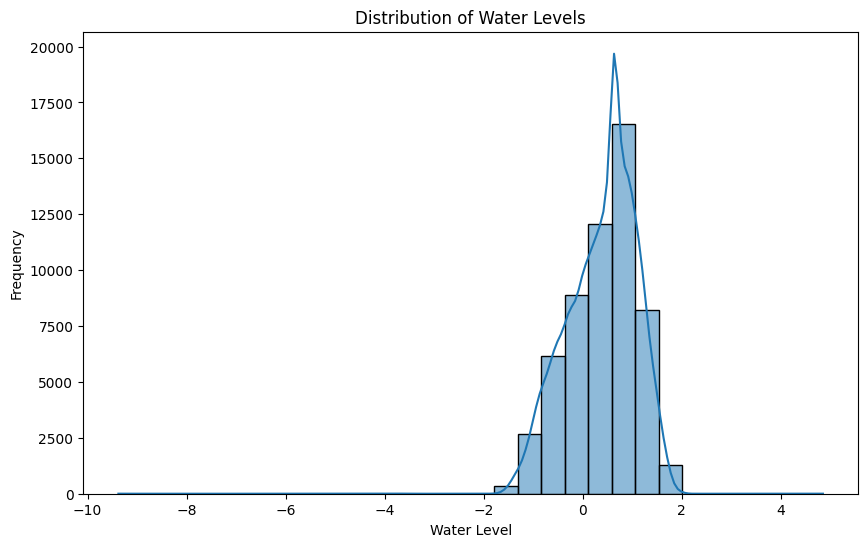

In [6]:
# Distribution of water levels
plt.figure(figsize=(10, 6))
sns.histplot(df['water_level'], bins=30, kde=True)
plt.title('Distribution of Water Levels')
plt.xlabel('Water Level')
plt.ylabel('Frequency')
plt.show()

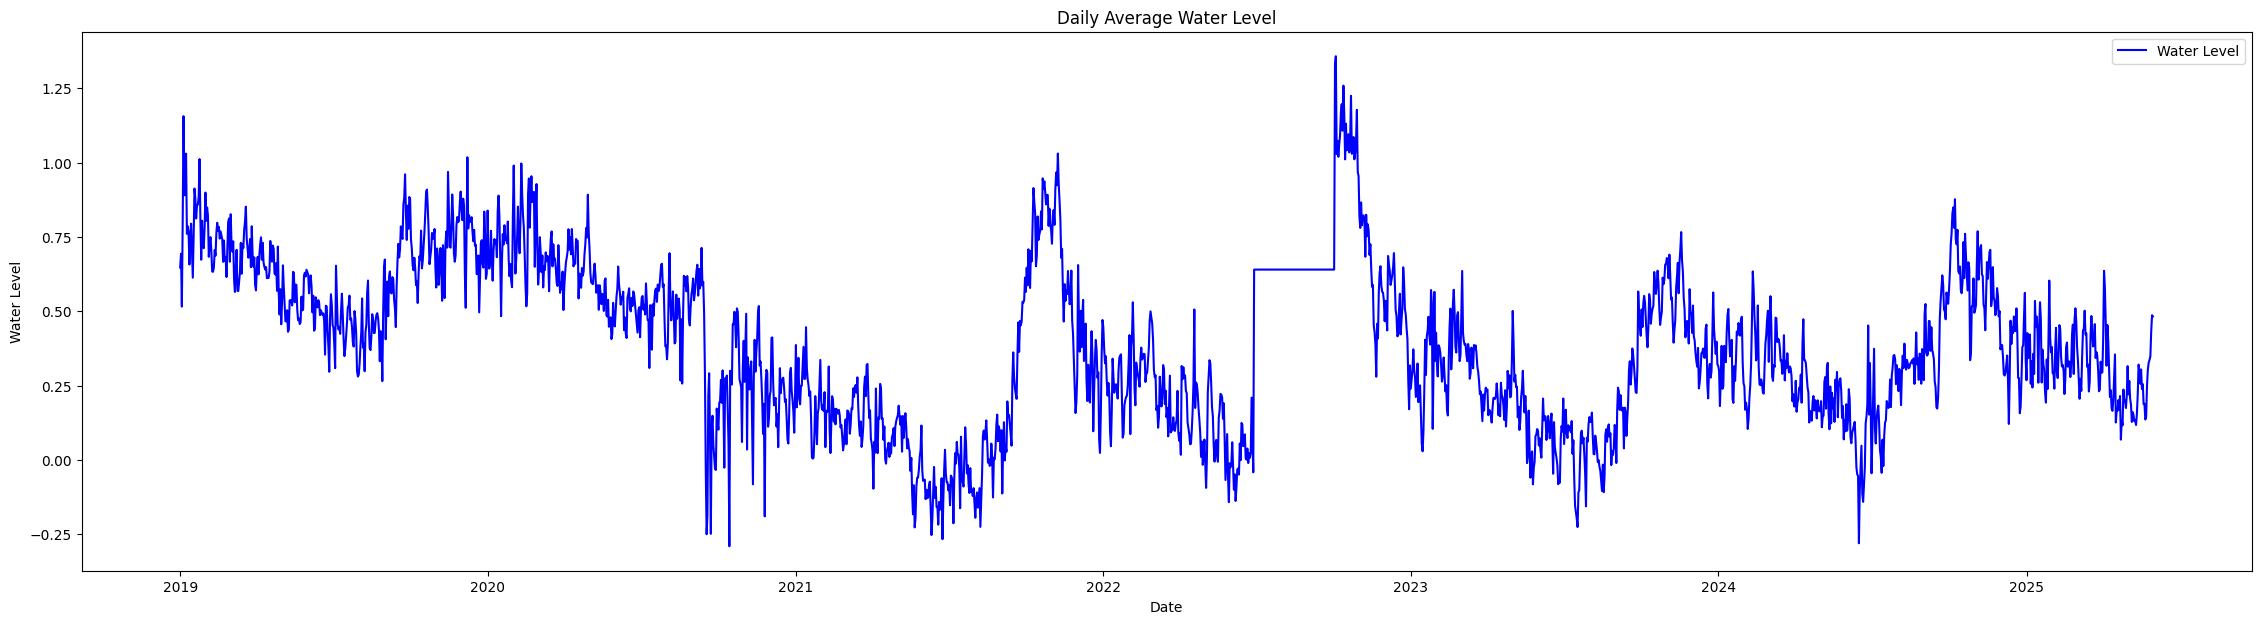

In [7]:
# Resample data to daily frequency and plot trends
df_daily = df.resample('D').mean()
plt.figure(figsize=(28, 7))
plt.plot(df_daily.index, df_daily['water_level'], label='Water Level', color='blue')
plt.title('Daily Average Water Level')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.legend()
plt.show()

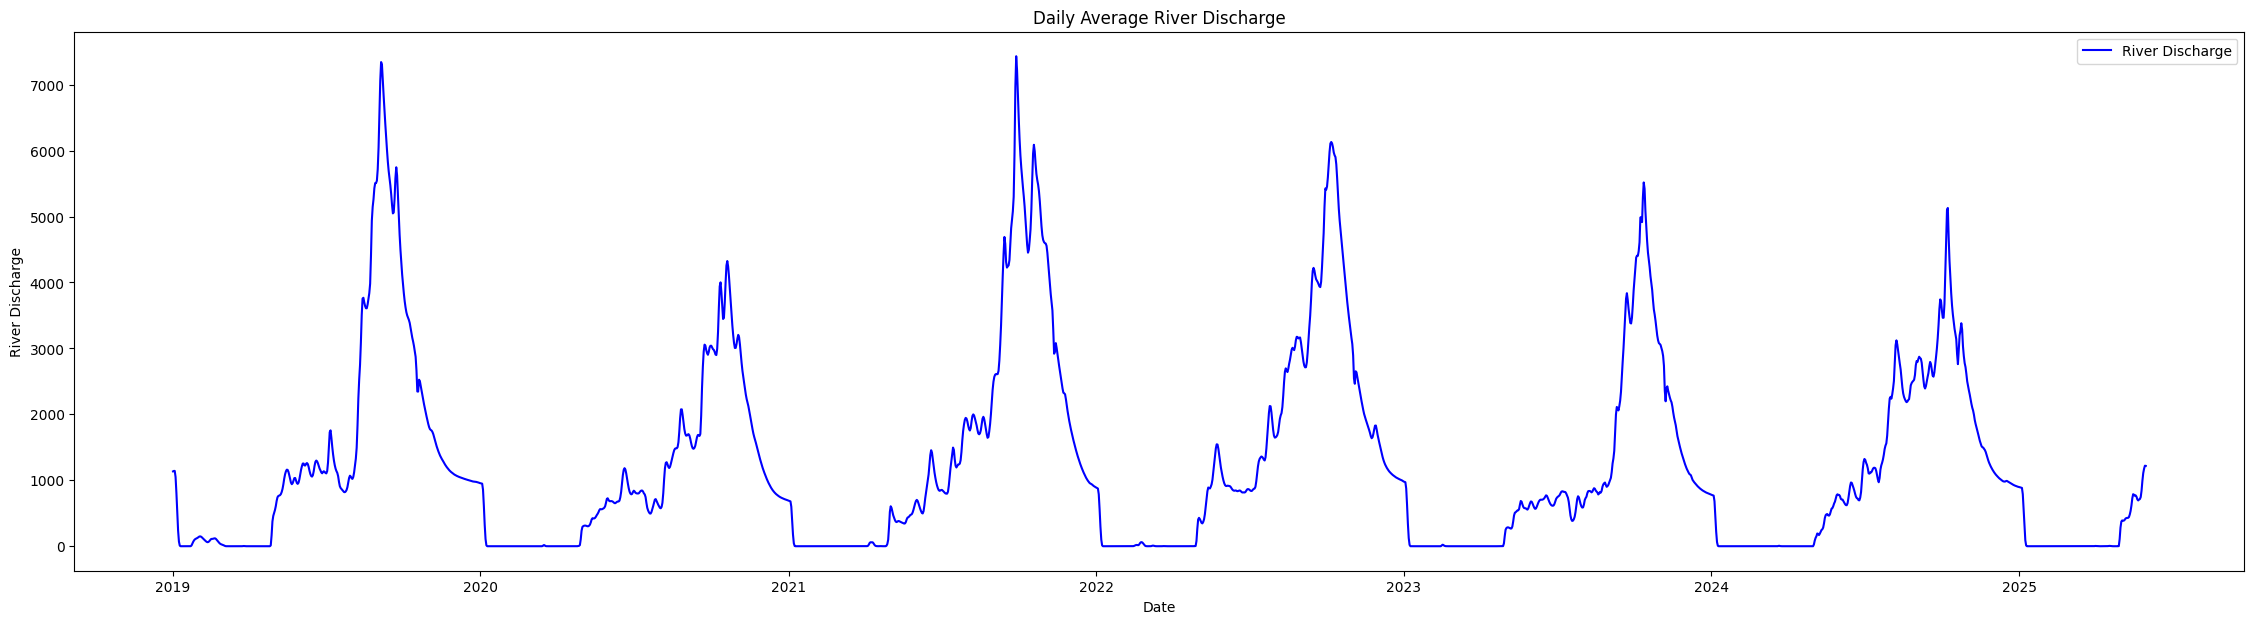

In [8]:
plt.figure(figsize=(28, 7))
plt.plot(df_daily.index, df_daily['river_discharge'], label='River Discharge', color='blue')
plt.title('Daily Average River Discharge')
plt.xlabel('Date')
plt.ylabel('River Discharge')
plt.legend()
plt.show()

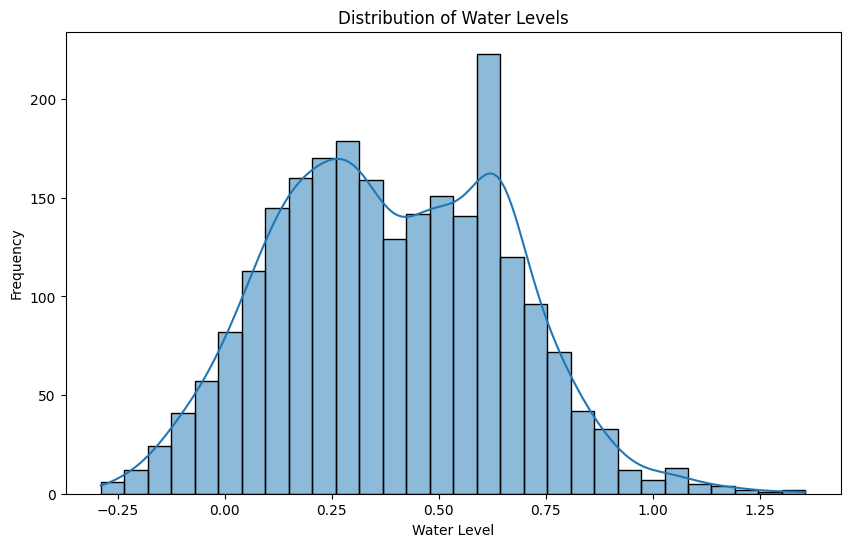

In [9]:
# Distribution of water levels
plt.figure(figsize=(10, 6))
sns.histplot(df_daily['water_level'], bins=30, kde=True)
plt.title('Distribution of Water Levels')
plt.xlabel('Water Level')
plt.ylabel('Frequency')
plt.show()

In [10]:
df_daily.describe()

water_level  temperature_2m         rain  showers  cloud_cover  \
count  2343.000000     2343.000000  2343.000000   2343.0  2343.000000   
mean      0.390225       28.193141     0.179494      0.0    69.235524   
std       0.269097        1.753753     0.304610      0.0    28.496241   
min      -0.290069       20.241667     0.000000      0.0     0.000000   
25%       0.181319       27.260417     0.000000      0.0    46.979167   
50%       0.378542       28.270833     0.041667      0.0    76.833333   
75%       0.610938       29.256250     0.245833      0.0    95.416667   
max       1.357361       33.179167     3.400000      0.0   100.000000   

       relative_humidity_2m  dew_point_2m  precipitation  weather_code  \
count           2343.000000   2343.000000    2343.000000   2343.000000   
mean              74.350494     22.830203       0.179494     12.820102   
std                9.223252      2.882363       0.304610     12.143622   
min               40.416667      9.679167       0.000000      0.000000   
25%               69.604167     22.229167       0.000000      2.458333   
50%               75.791667     24.012500       0.041667      9.208333   
75%               80.916667     24.635417       0.245833     19.187500   
max               92.291667     26.675000       3.400000     59.416667   

       pressure_msl  surface_pressure  wind_speed_10m  wind_direction_10m  \
count   2343.000000       2343.000000     2343.000000         2343.000000   
mean    1009.349577       1009.249577        9.426142          180.359386   
std        2.704624          2.704624        3.071295           54.379316   
min     1001.941667       1001.841667        2.958333           26.916667   
25%     1007.289583       1007.189583        7.127083          156.875000   
50%     1009.204167       1009.104167        9.037500          186.583333   
75%     1011.318750       1011.218750       11.283333          218.229167   
max     1018.270833       1018.170833       20.291667          321.750000   

       wind_gusts_10m  et0_fao_evapotranspiration  river_discharge  
count     2343.000000                 2343.000000      2343.000000  
mean        20.077043                    0.183186      1223.418451  
std          5.131952                    0.041681      1467.460437  
min          9.845833                    0.033333         0.000000  
25%         16.172917                    0.158333         0.192812  
50%         19.304167                    0.185000       819.926667  
75%         23.389583                    0.210000      1715.285313  
max         43.175000                    0.307917      7430.695833

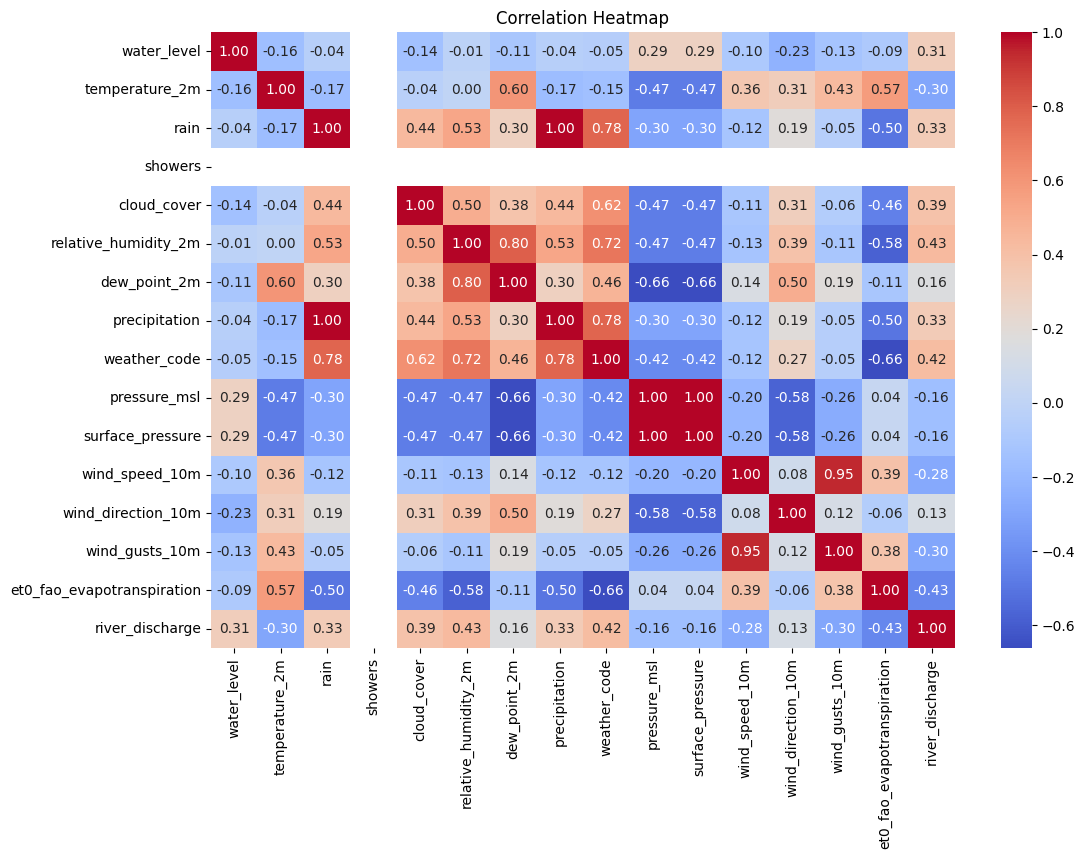

In [11]:
# Create a correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_daily.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

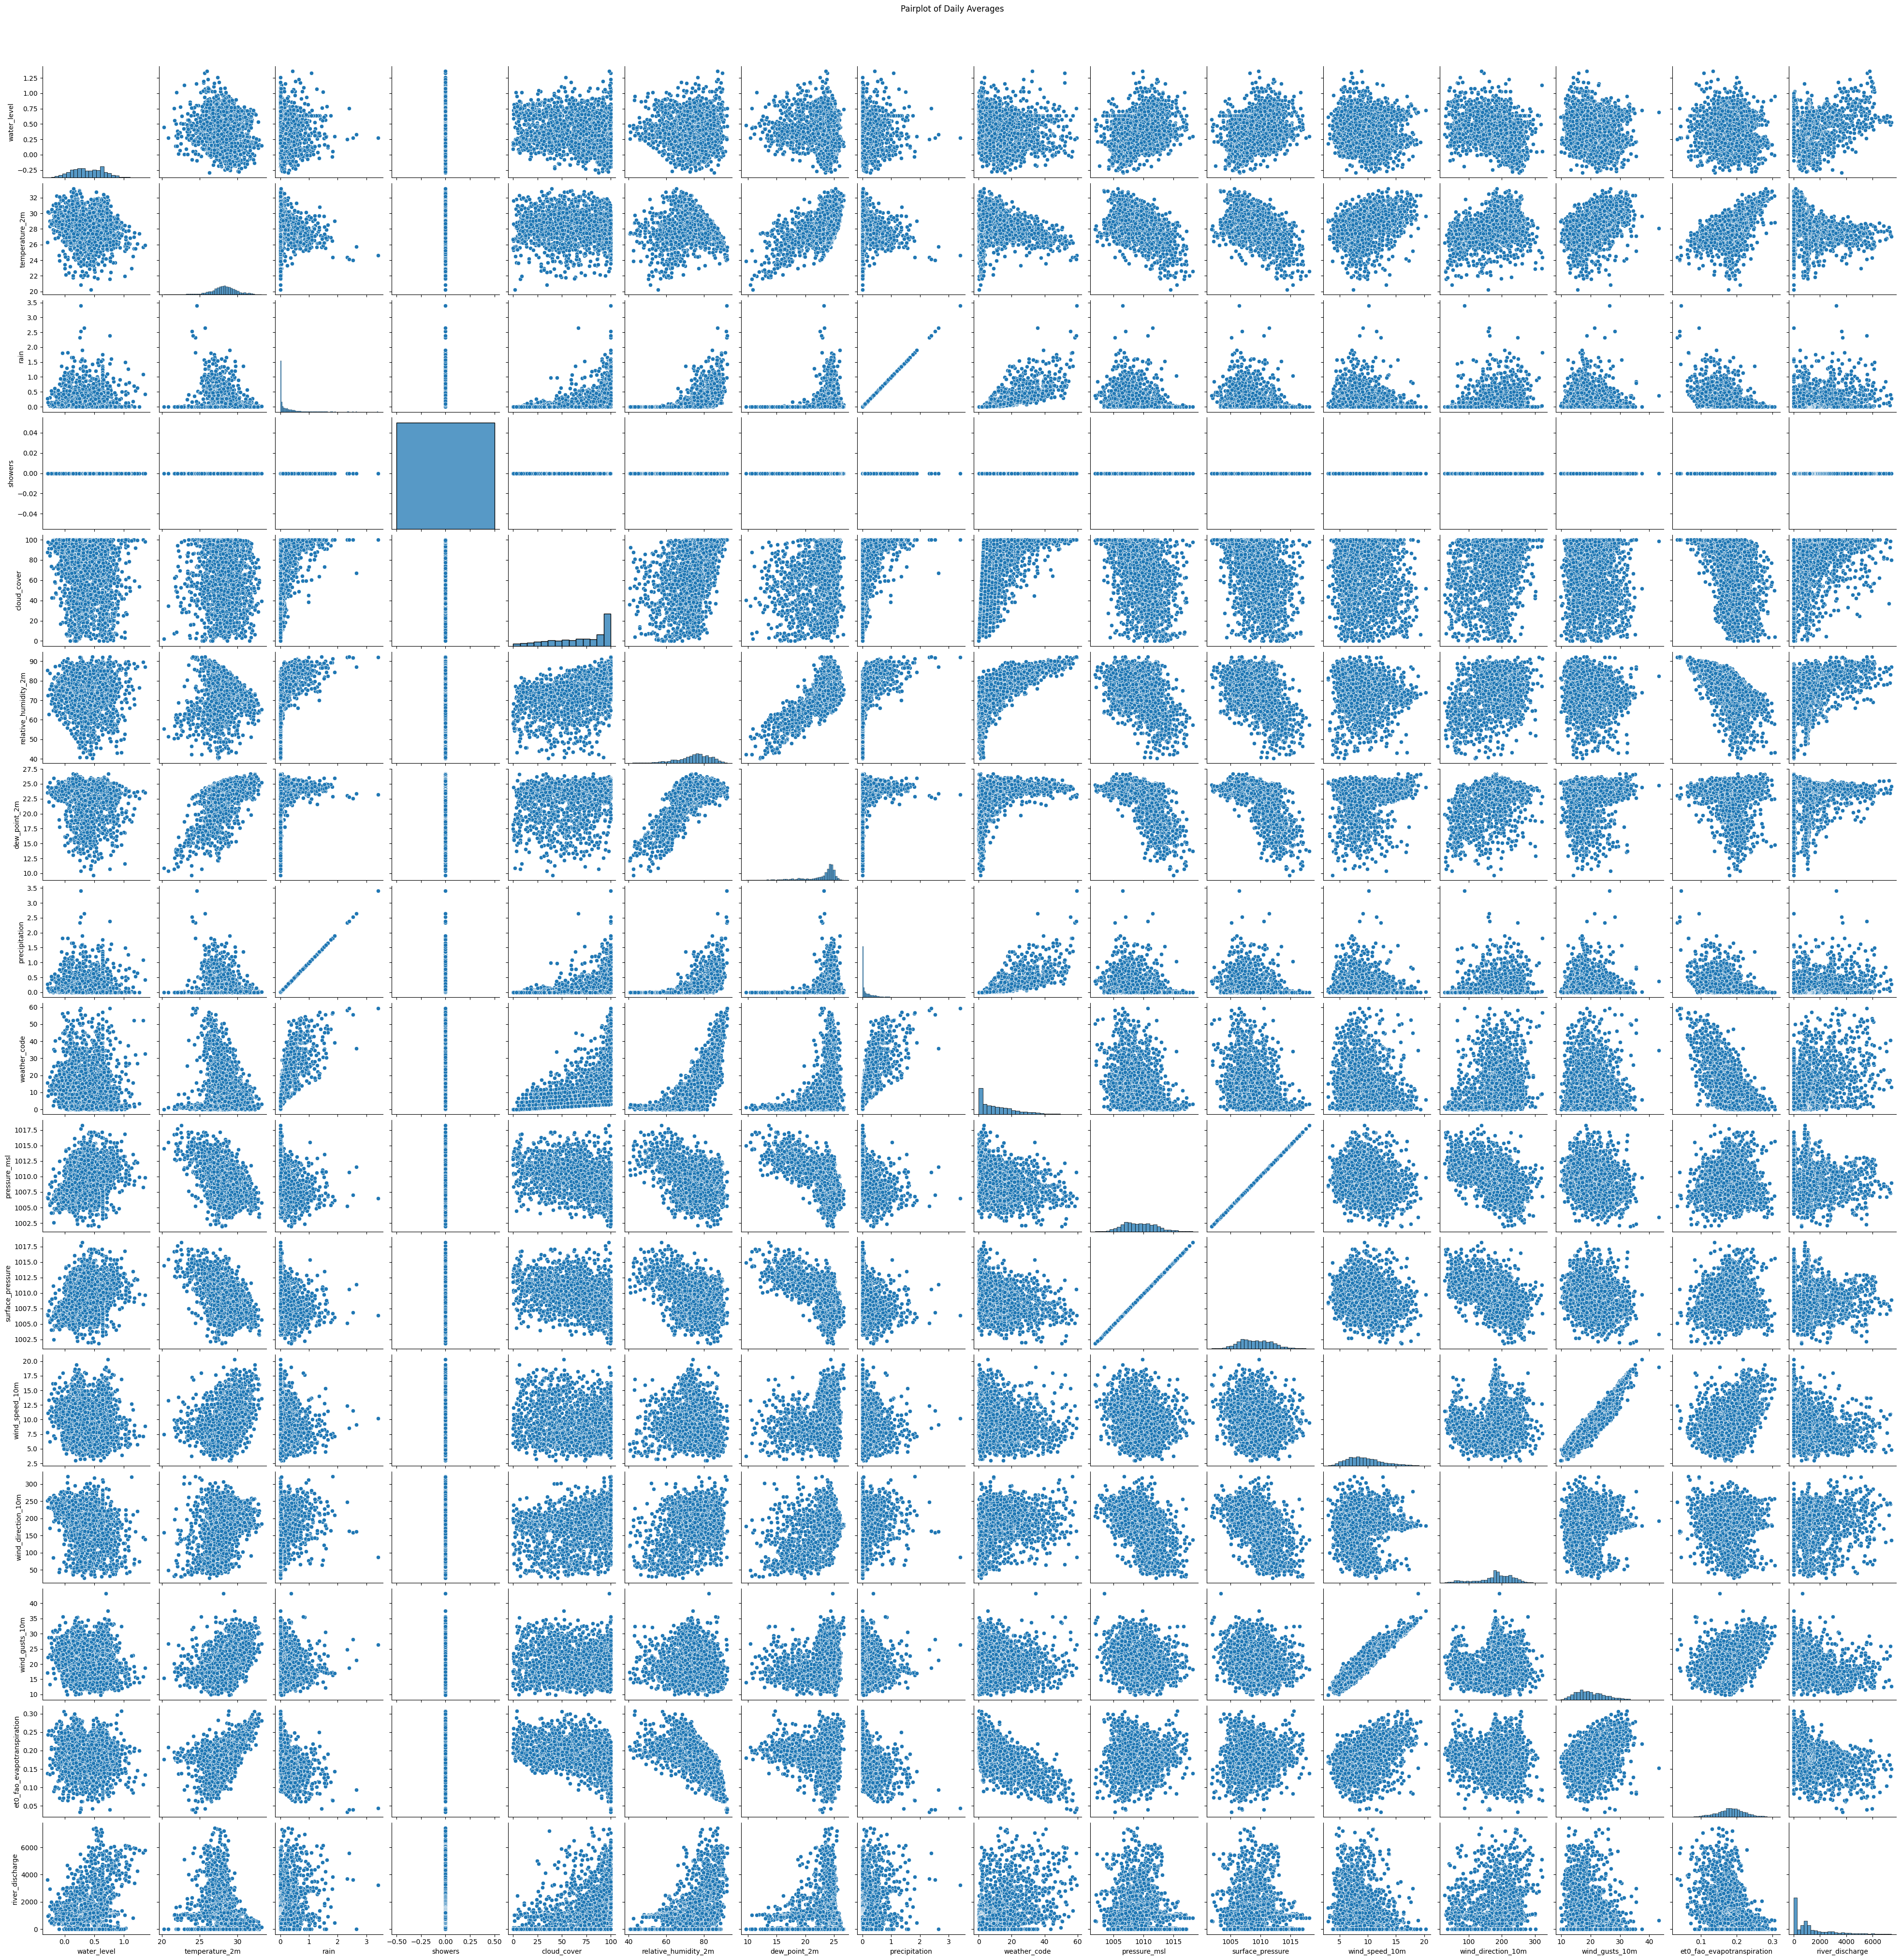

In [12]:
# Create a pairplot to visualize relationships between variables
sns.pairplot(df_daily)
plt.suptitle('Pairplot of Daily Averages', y=1.02)
plt.show()

In [13]:
df_daily.isna().sum()

water_level                   0
temperature_2m                0
rain                          0
showers                       0
cloud_cover                   0
relative_humidity_2m          0
dew_point_2m                  0
precipitation                 0
weather_code                  0
pressure_msl                  0
surface_pressure              0
wind_speed_10m                0
wind_direction_10m            0
wind_gusts_10m                0
et0_fao_evapotranspiration    0
river_discharge               0
dtype: int64

# Feature Engineering & Advanced EDA

Now we'll focus on creating and analyzing features that can help predict water level.

## 1. Temporal Feature Extraction

Extract time-based features that may influence water levels (hour, day of week, month, season, etc.)

In [14]:
# Create a copy for feature engineering
df_fe = df_daily.copy()

# Extract temporal features
df_fe['hour'] = df_fe.index.hour
df_fe['day'] = df_fe.index.day
df_fe['month'] = df_fe.index.month
df_fe['year'] = df_fe.index.year
df_fe['day_of_week'] = df_fe.index.dayofweek
df_fe['day_of_year'] = df_fe.index.dayofyear
df_fe['week_of_year'] = df_fe.index.isocalendar().week
df_fe['quarter'] = df_fe.index.quarter

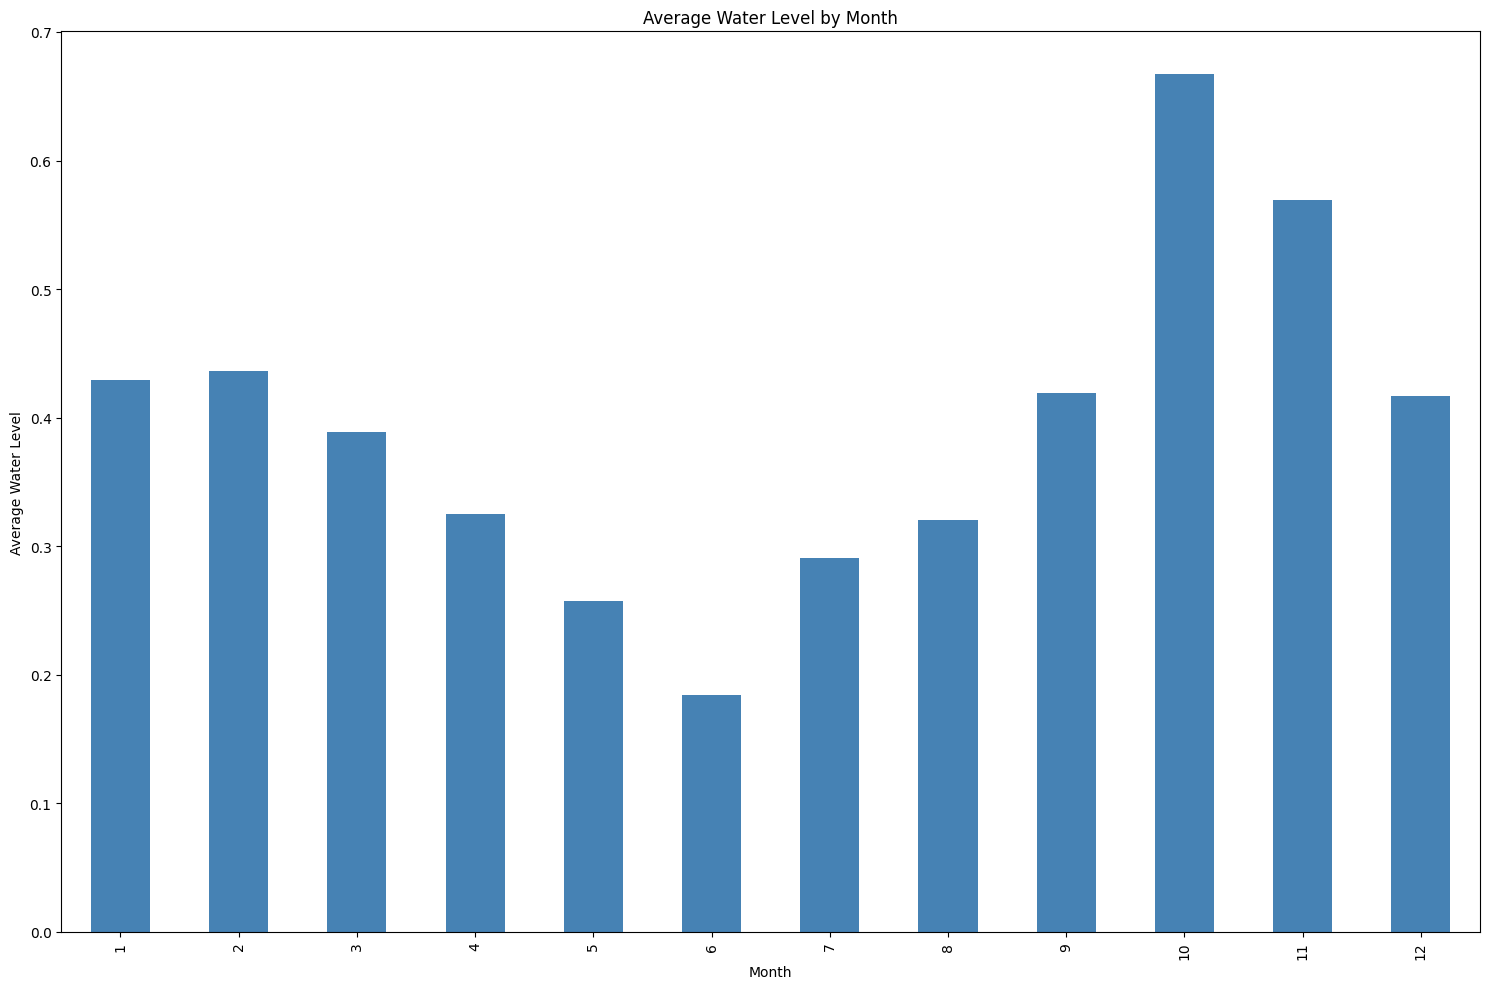

In [15]:
# Visualize seasonal patterns
fig, axes = plt.subplots(1, 1, figsize=(15, 10))

# Monthly pattern
df_fe.groupby('month')['water_level'].mean().plot(kind='bar', ax=axes, color='steelblue')
axes.set_title('Average Water Level by Month')
axes.set_xlabel('Month')
axes.set_ylabel('Average Water Level')

plt.tight_layout()
plt.show()

## 2. Missing Data Analysis

Understanding missing data patterns is crucial for data quality and model performance.

In [16]:
# Analyze missing data
missing_data = df_daily.isnull().sum()
missing_percent = (missing_data / len(df_daily)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Percentage': missing_percent
}).sort_values('Percentage', ascending=False)

print("Missing Data Summary:")
print(missing_df[missing_df['Missing_Count'] > 0])

# Visualize missing data
if missing_df['Missing_Count'].sum() > 0:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Bar plot of missing data
    missing_df[missing_df['Missing_Count'] > 0].plot(
        y='Percentage', kind='barh', ax=axes[0], color='coral'
    )
    axes[0].set_title('Percentage of Missing Data by Feature')
    axes[0].set_xlabel('Percentage (%)')
    
    # Heatmap of missing data pattern
    sns.heatmap(df_daily.isnull().T, cbar=False, cmap='viridis', ax=axes[1])
    axes[1].set_title('Missing Data Pattern')
    axes[1].set_xlabel('Index')
    
    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing data found!")

Missing Data Summary:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []

No missing data found!


## 3. Outlier Detection

Identify outliers in key variables that might affect water level predictions.


water_level:
  Lower Bound: -0.46, Upper Bound: 1.26
  Outliers: 3 (0.13%)

temperature_2m:
  Lower Bound: 24.27, Upper Bound: 32.25
  Outliers: 85 (3.63%)

precipitation:
  Lower Bound: -0.37, Upper Bound: 0.61
  Outliers: 175 (7.47%)

rain:
  Lower Bound: -0.37, Upper Bound: 0.61
  Outliers: 175 (7.47%)

wind_speed_10m:
  Lower Bound: 0.89, Upper Bound: 17.52
  Outliers: 23 (0.98%)

relative_humidity_2m:
  Lower Bound: 52.64, Upper Bound: 97.89
  Outliers: 68 (2.90%)


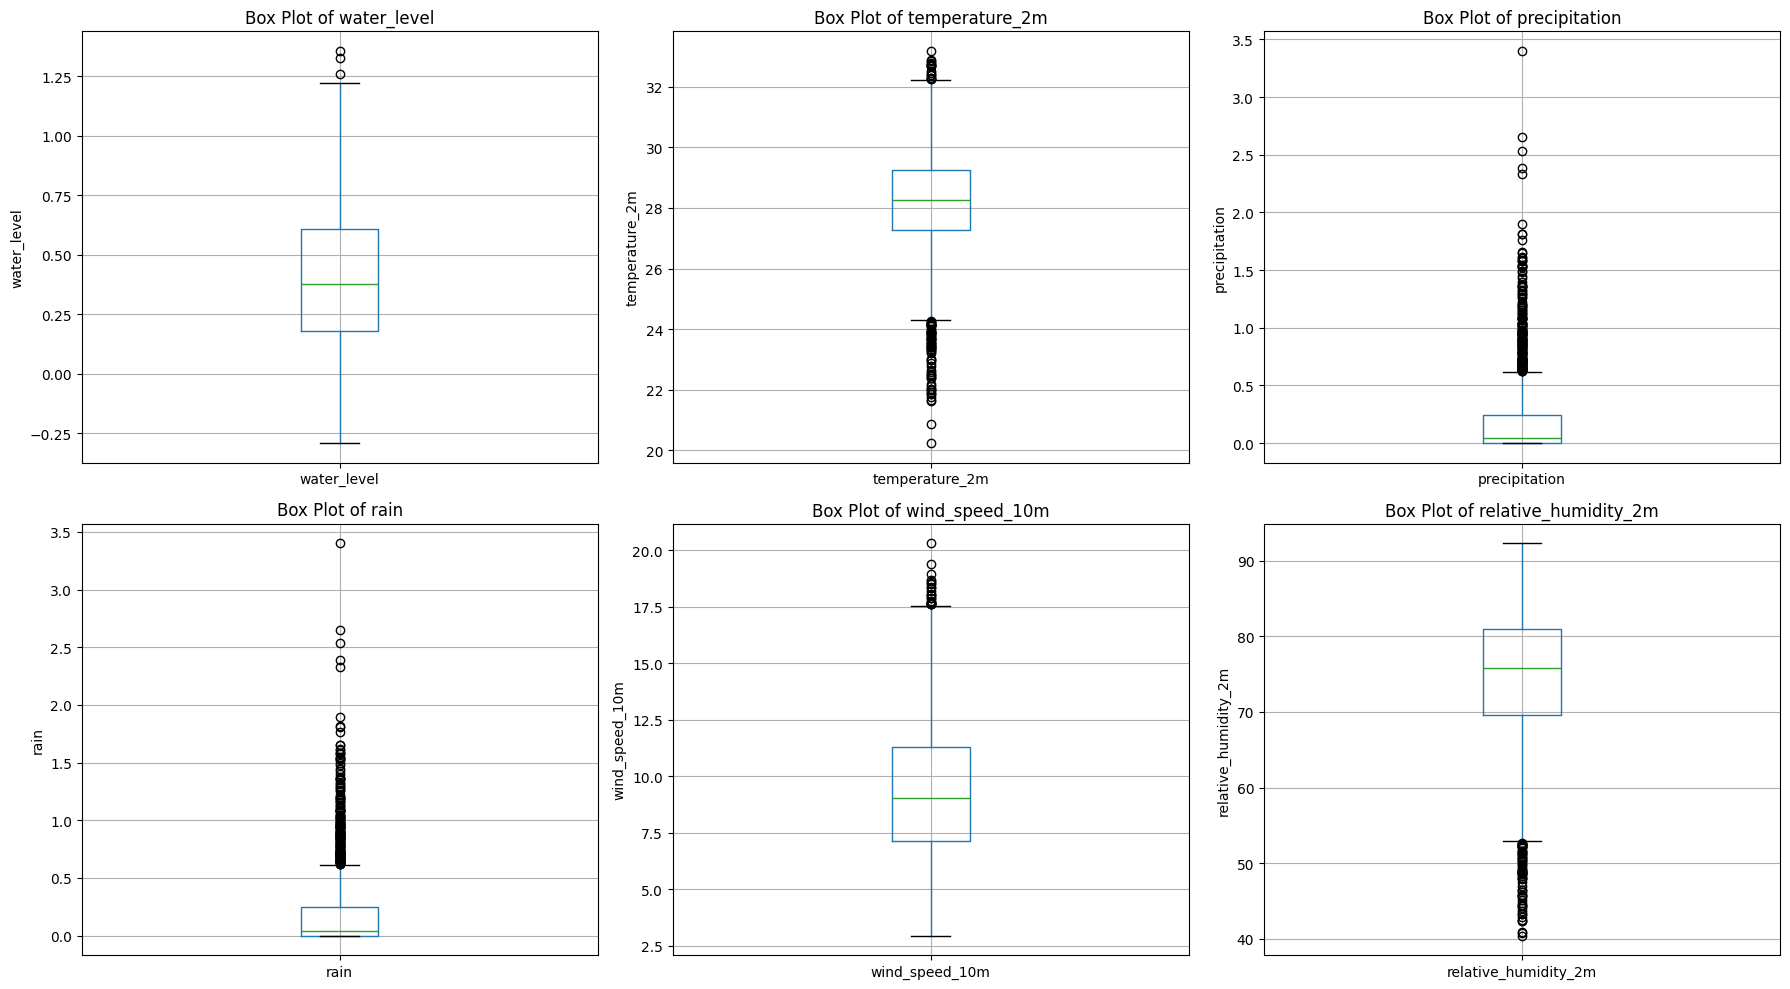

In [17]:
# Detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Key columns to check for outliers
key_columns = ['water_level', 'temperature_2m', 'precipitation', 'rain', 
               'wind_speed_10m', 'relative_humidity_2m']

outlier_counts = {}
for col in key_columns:
    if col in df_daily.columns:
        outliers, lb, ub = detect_outliers_iqr(df_daily, col)
        outlier_counts[col] = len(outliers)
        print(f"\n{col}:")
        print(f"  Lower Bound: {lb:.2f}, Upper Bound: {ub:.2f}")
        print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df_daily)*100:.2f}%)")

# Visualize outliers with box plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(key_columns):
    if col in df_daily.columns:
        df_daily.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'Box Plot of {col}')
        axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

## 4. Distribution Analysis & Skewness

Understanding the distribution of variables is important for choosing appropriate models and transformations.

Skewness Analysis:
                       Feature  Skewness
2                         rain  3.195312
7                precipitation  3.195312
6                 dew_point_2m -1.702869
15             river_discharge  1.558220
8                 weather_code  1.203724
5         relative_humidity_2m -0.833499
12          wind_direction_10m -0.694550
4                  cloud_cover -0.667026
11              wind_speed_10m  0.600080
13              wind_gusts_10m  0.568799
1               temperature_2m -0.462631
10            surface_pressure  0.244065
9                 pressure_msl  0.244065
14  et0_fao_evapotranspiration -0.238740
0                  water_level  0.135460
3                      showers  0.000000


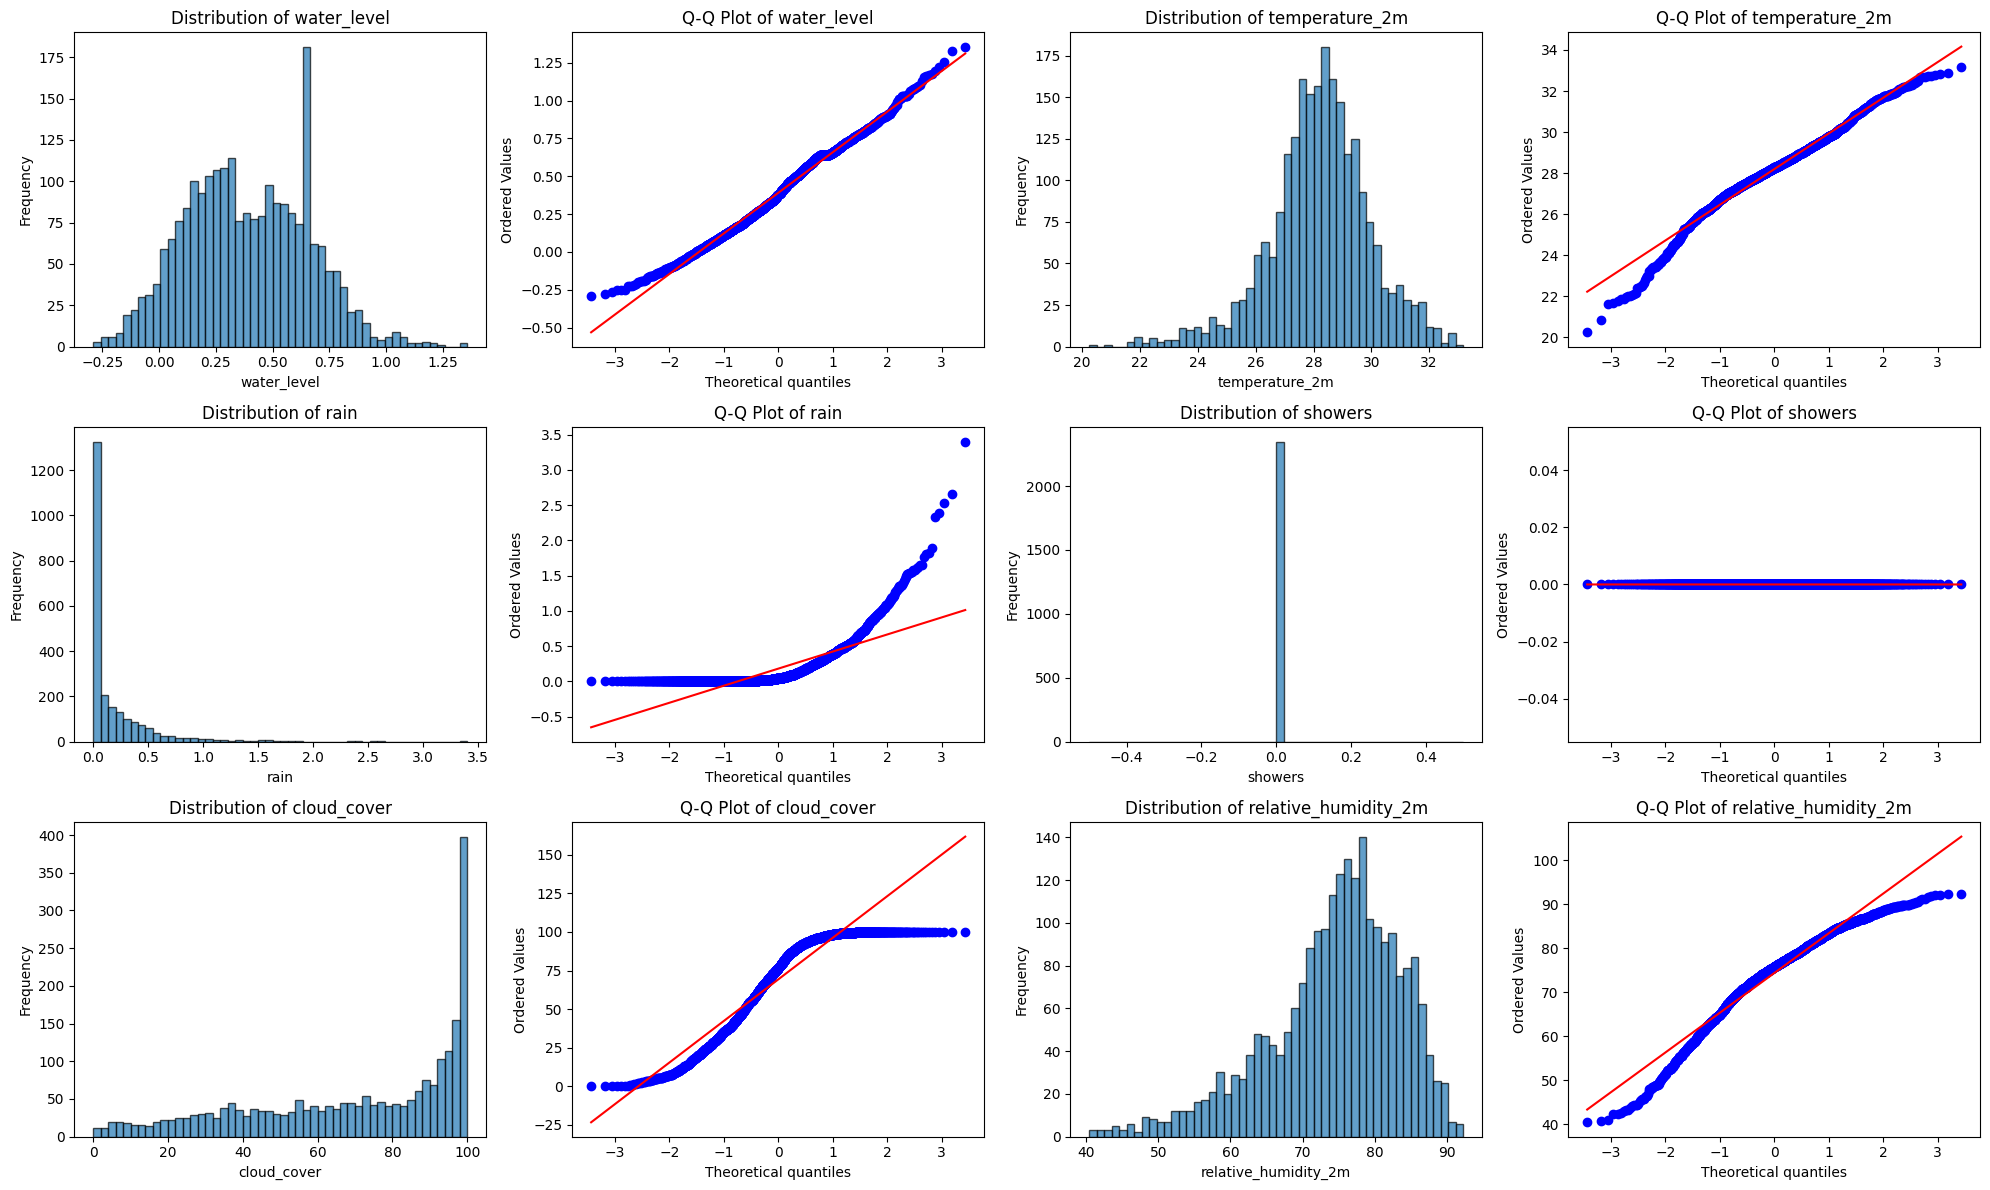

In [18]:
# Calculate skewness for all numeric columns
from scipy import stats

skewness_data = []
for col in df_daily.select_dtypes(include=[np.number]).columns:
    skew = df_daily[col].skew()
    skewness_data.append({'Feature': col, 'Skewness': skew})

skewness_df = pd.DataFrame(skewness_data).sort_values('Skewness', key=abs, ascending=False)
print("Skewness Analysis:")
print(skewness_df)

# Visualize distributions with histograms and Q-Q plots
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.ravel()

numeric_cols = df_daily.select_dtypes(include=[np.number]).columns[:6]

for idx, col in enumerate(numeric_cols):
    # Histogram with KDE
    axes[idx*2].hist(df_daily[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx*2].set_title(f'Distribution of {col}')
    axes[idx*2].set_xlabel(col)
    axes[idx*2].set_ylabel('Frequency')
    
    # Q-Q plot
    stats.probplot(df_daily[col].dropna(), dist="norm", plot=axes[idx*2+1])
    axes[idx*2+1].set_title(f'Q-Q Plot of {col}')

plt.tight_layout()
plt.show()

## 5. Lag Correlation Analysis

Analyze how water levels correlate with lagged values of features (e.g., rainfall from previous days).

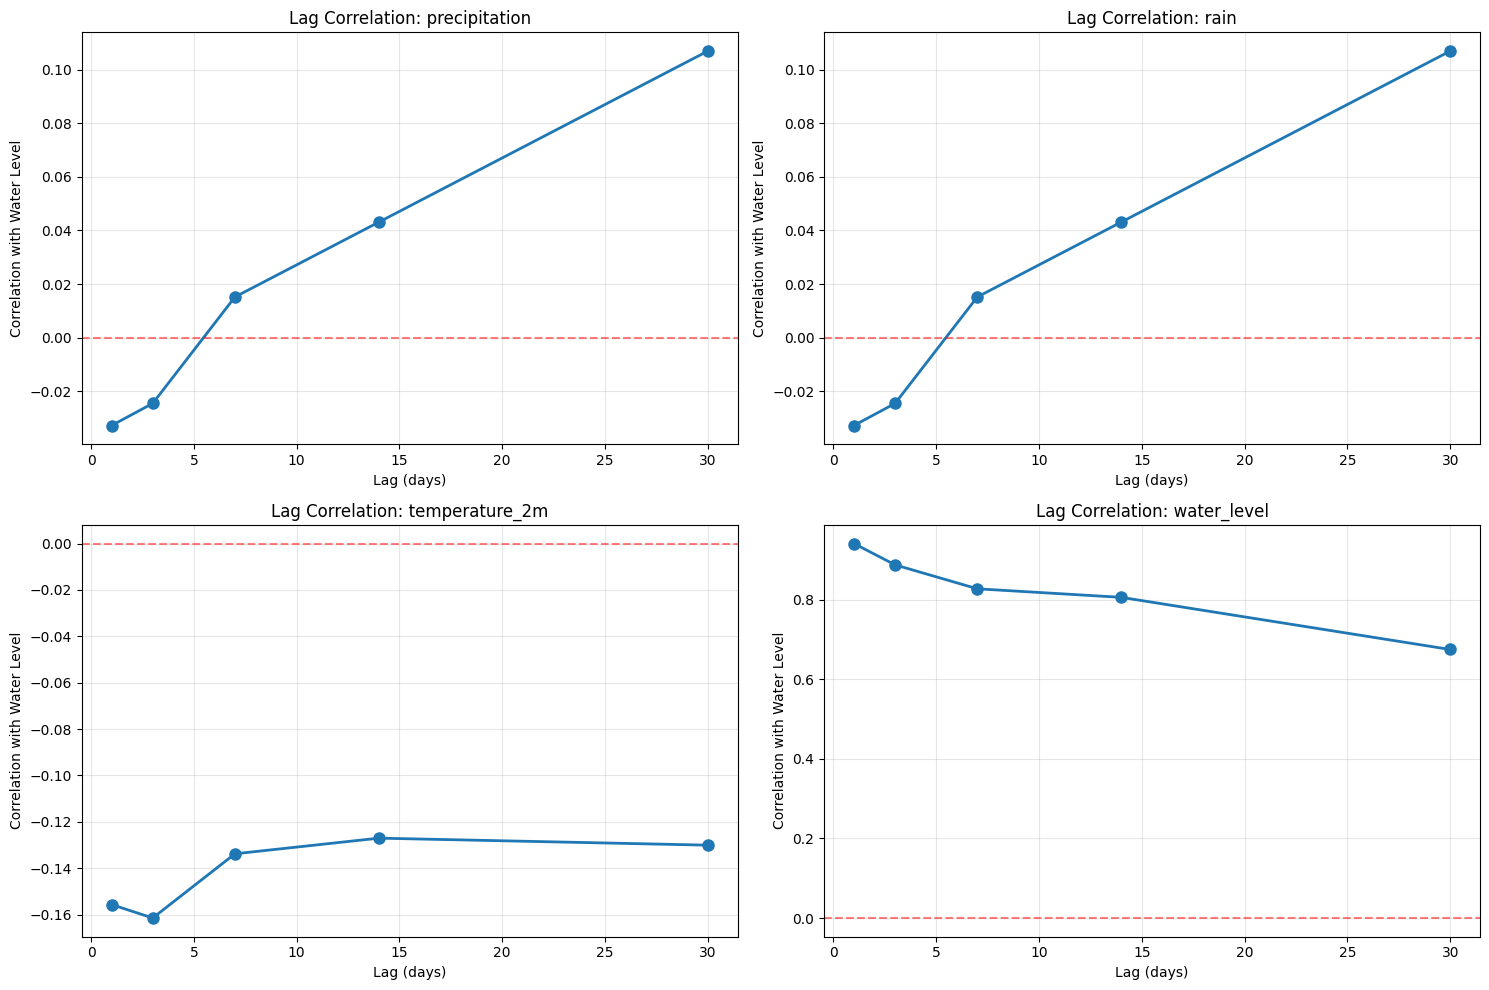


Lag Correlation Summary:

precipitation:
  Lag 1 days: -0.0328
  Lag 3 days: -0.0245
  Lag 7 days: 0.0152
  Lag 14 days: 0.0431
  Lag 30 days: 0.1069

rain:
  Lag 1 days: -0.0328
  Lag 3 days: -0.0245
  Lag 7 days: 0.0152
  Lag 14 days: 0.0431
  Lag 30 days: 0.1069

temperature_2m:
  Lag 1 days: -0.1557
  Lag 3 days: -0.1615
  Lag 7 days: -0.1338
  Lag 14 days: -0.1270
  Lag 30 days: -0.1301

water_level:
  Lag 1 days: 0.9417
  Lag 3 days: 0.8881
  Lag 7 days: 0.8279
  Lag 14 days: 0.8064
  Lag 30 days: 0.6752


In [19]:
# Create lagged features for key variables
lag_periods = [1, 3, 7, 14, 30]  # 1 day, 3 days, 1 week, 2 weeks, 1 month
key_features = ['precipitation', 'rain', 'temperature_2m', 'water_level']

# Calculate correlations with lagged features
lag_correlations = {}

for feature in key_features:
    if feature in df_daily.columns:
        correlations = []
        for lag in lag_periods:
            lagged_feature = df_daily[feature].shift(lag)
            corr = df_daily['water_level'].corr(lagged_feature)
            correlations.append(corr)
        lag_correlations[feature] = correlations

# Visualize lag correlations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, (feature, corrs) in enumerate(lag_correlations.items()):
    axes[idx].plot(lag_periods, corrs, marker='o', linewidth=2, markersize=8)
    axes[idx].set_xlabel('Lag (days)')
    axes[idx].set_ylabel('Correlation with Water Level')
    axes[idx].set_title(f'Lag Correlation: {feature}')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].axhline(y=0, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Print correlation values
print("\nLag Correlation Summary:")
for feature, corrs in lag_correlations.items():
    print(f"\n{feature}:")
    for lag, corr in zip(lag_periods, corrs):
        print(f"  Lag {lag} days: {corr:.4f}")

## 6. Rolling Window Statistics

Analyze trends using rolling means and standard deviations.

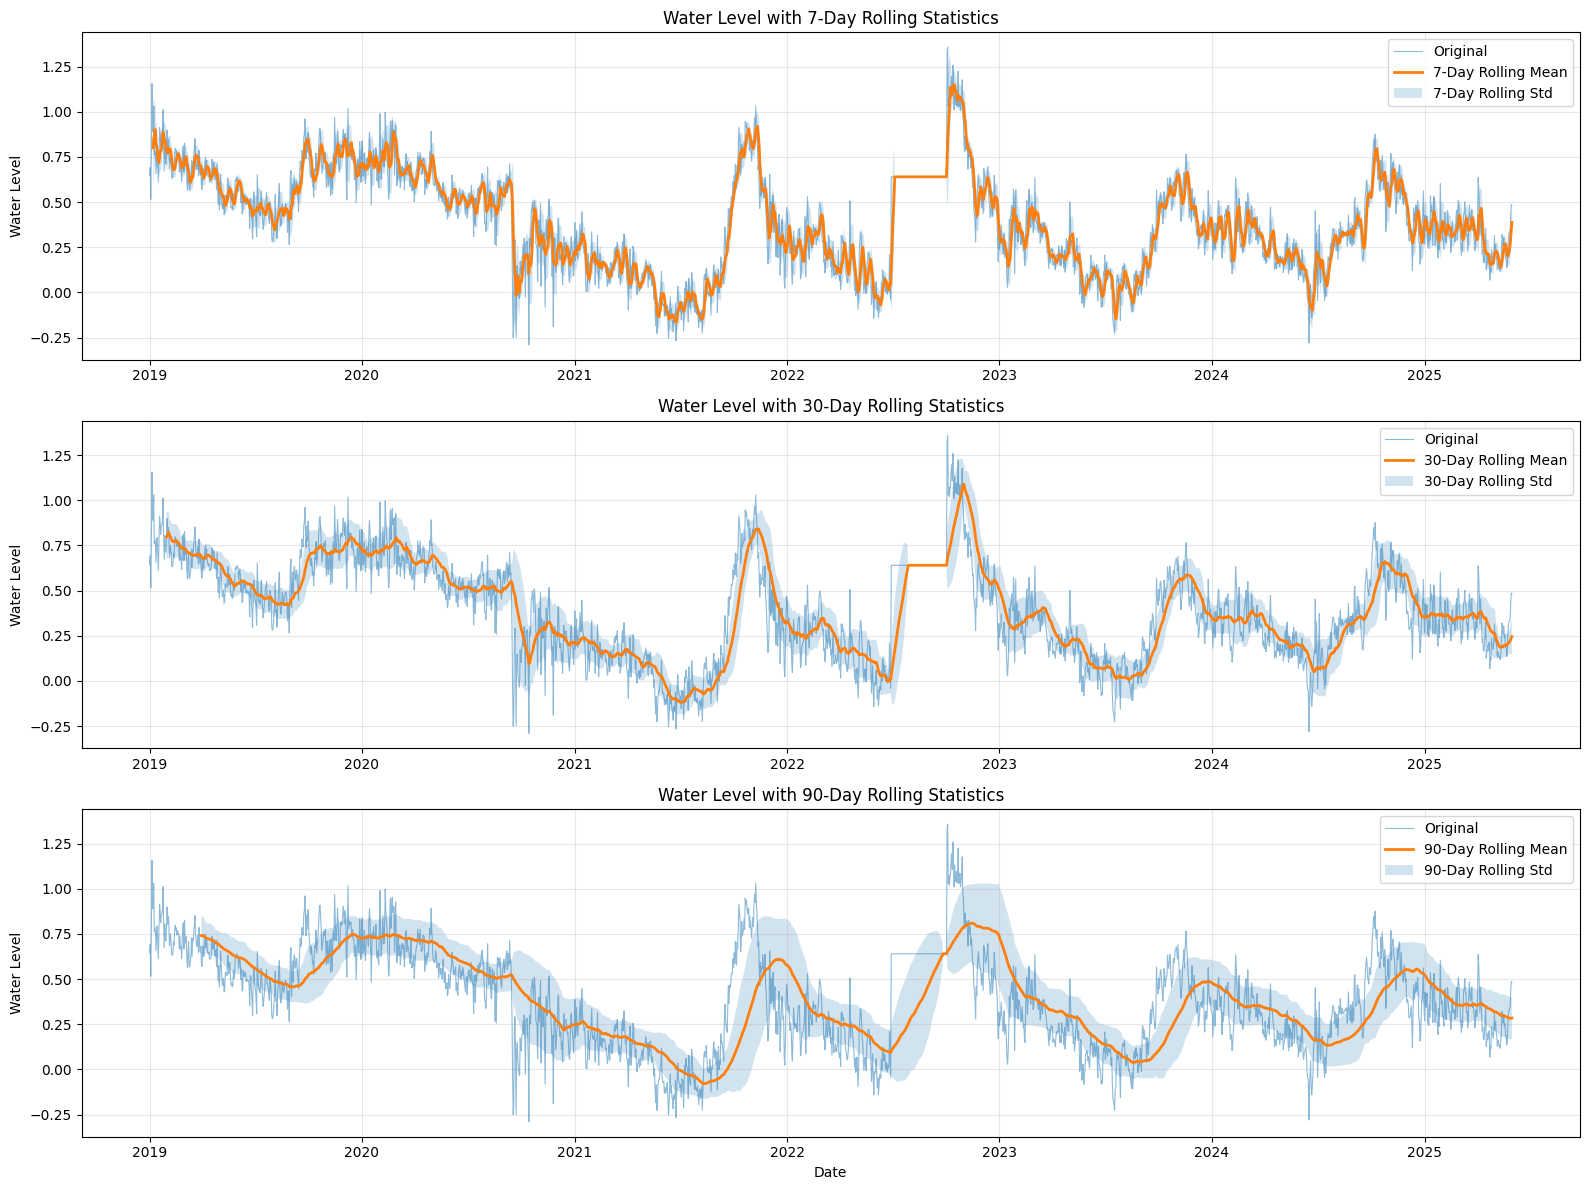

In [20]:
# Calculate rolling statistics for water level
windows = [7, 30, 90]  # Weekly, monthly, and quarterly windows

fig, axes = plt.subplots(3, 1, figsize=(16, 12))

for idx, window in enumerate(windows):
    rolling_mean = df_daily['water_level'].rolling(window=window).mean()
    rolling_std = df_daily['water_level'].rolling(window=window).std()
    
    axes[idx].plot(df_daily.index, df_daily['water_level'], 
                   label='Original', alpha=0.5, linewidth=0.8)
    axes[idx].plot(df_daily.index, rolling_mean, 
                   label=f'{window}-Day Rolling Mean', linewidth=2)
    axes[idx].fill_between(df_daily.index, 
                           rolling_mean - rolling_std, 
                           rolling_mean + rolling_std,
                           alpha=0.2, label=f'{window}-Day Rolling Std')
    axes[idx].set_title(f'Water Level with {window}-Day Rolling Statistics')
    axes[idx].set_ylabel('Water Level')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()

## 7. Weather Impact Analysis

Analyze how different weather conditions affect water levels.

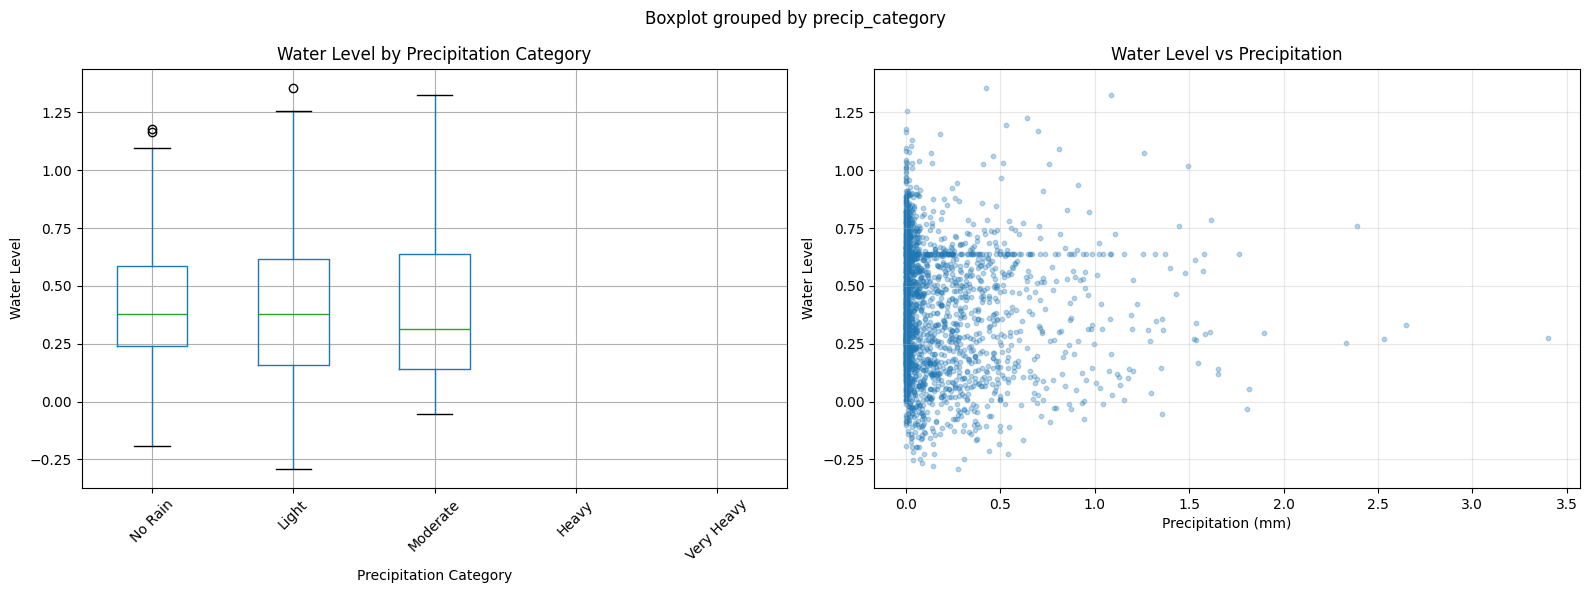


Water Level Statistics by Precipitation Category:
                  count      mean       std       min       25%       50%  \
precip_category                                                             
No Rain           655.0  0.417160  0.241728 -0.189653  0.240938  0.379167   
Light            1621.0  0.379542  0.278120 -0.290069  0.157708  0.380556   
Moderate           67.0  0.385371  0.286208 -0.055625  0.140868  0.315417   
Heavy               0.0       NaN       NaN       NaN       NaN       NaN   
Very Heavy          0.0       NaN       NaN       NaN       NaN       NaN   

                      75%       max  
precip_category                      
No Rain          0.588472  1.177014  
Light            0.615069  1.357361  
Moderate         0.638160  1.327014  
Heavy                 NaN       NaN  
Very Heavy            NaN       NaN  


C:\Users\USER\AppData\Local\Temp\ipykernel_1256\540412742.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_daily.groupby('precip_category')['water_level'].describe())


In [21]:
# Analyze precipitation impact
if 'precipitation' in df_daily.columns:
    # Categorize precipitation levels
    df_daily['precip_category'] = pd.cut(df_daily['precipitation'], 
                                          bins=[-0.01, 0, 1, 5, 10, 100],
                                          labels=['No Rain', 'Light', 'Moderate', 'Heavy', 'Very Heavy'])
    
    # Water level by precipitation category
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Box plot
    df_daily.boxplot(column='water_level', by='precip_category', ax=axes[0])
    axes[0].set_title('Water Level by Precipitation Category')
    axes[0].set_xlabel('Precipitation Category')
    axes[0].set_ylabel('Water Level')
    plt.sca(axes[0])
    plt.xticks(rotation=45)
    
    # Scatter plot
    axes[1].scatter(df_daily['precipitation'], df_daily['water_level'], 
                    alpha=0.3, s=10)
    axes[1].set_xlabel('Precipitation (mm)')
    axes[1].set_ylabel('Water Level')
    axes[1].set_title('Water Level vs Precipitation')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Statistical summary
    print("\nWater Level Statistics by Precipitation Category:")
    print(df_daily.groupby('precip_category')['water_level'].describe())

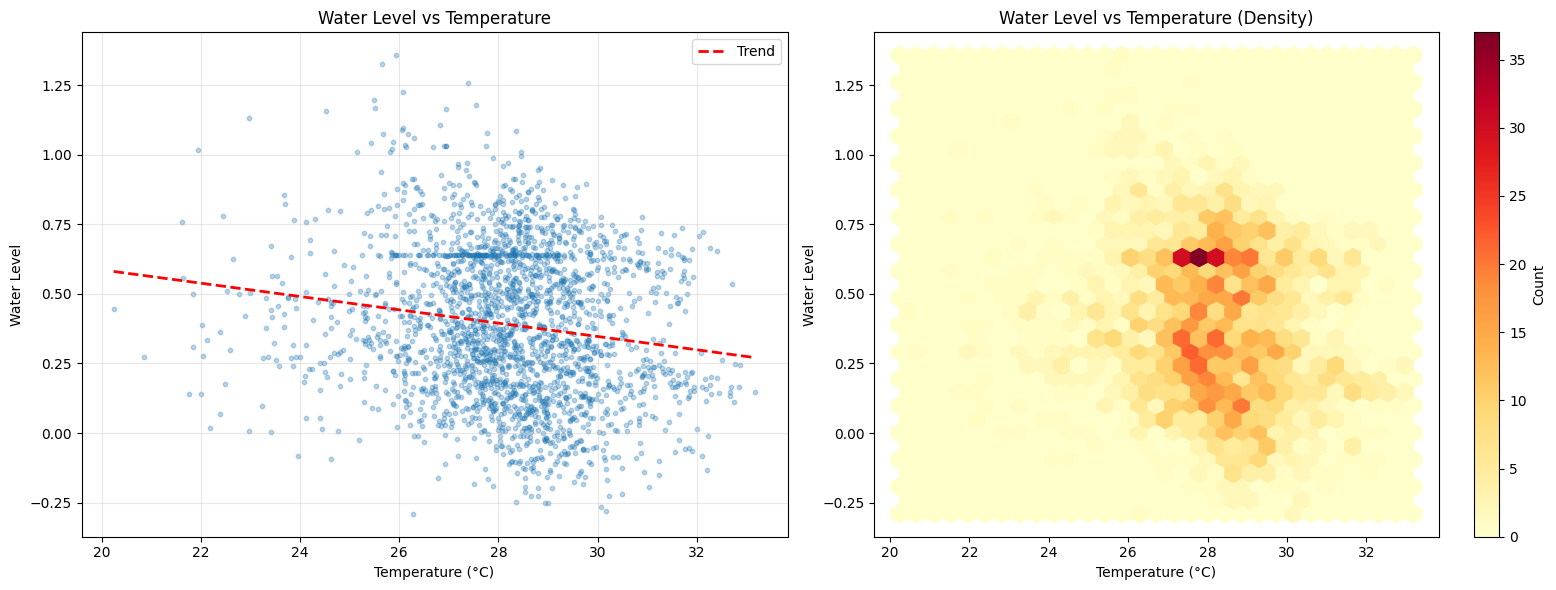

In [22]:
# Temperature impact on water level
if 'temperature_2m' in df_daily.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Scatter plot with trend line
    axes[0].scatter(df_daily['temperature_2m'], df_daily['water_level'], 
                    alpha=0.3, s=10)
    
    # Add trend line
    z = np.polyfit(df_daily['temperature_2m'].dropna(), 
                   df_daily.loc[df_daily['temperature_2m'].notna(), 'water_level'], 1)
    p = np.poly1d(z)
    axes[0].plot(df_daily['temperature_2m'].sort_values(), 
                 p(df_daily['temperature_2m'].sort_values()), 
                 "r--", linewidth=2, label='Trend')
    axes[0].set_xlabel('Temperature (°C)')
    axes[0].set_ylabel('Water Level')
    axes[0].set_title('Water Level vs Temperature')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Hexbin plot for density
    axes[1].hexbin(df_daily['temperature_2m'], df_daily['water_level'], 
                   gridsize=30, cmap='YlOrRd')
    axes[1].set_xlabel('Temperature (°C)')
    axes[1].set_ylabel('Water Level')
    axes[1].set_title('Water Level vs Temperature (Density)')
    plt.colorbar(axes[1].collections[0], ax=axes[1], label='Count')
    
    plt.tight_layout()
    plt.show()

## 8. Time Series Autocorrelation

Analyze autocorrelation to understand the time series structure and seasonality.

In [23]:
# Autocorrelation and Partial Autocorrelation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Autocorrelation Function (ACF)
plot_acf(df_daily['water_level'].dropna(), lags=60, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF) - Water Level')
axes[0].set_xlabel('Lag (days)')

# Partial Autocorrelation Function (PACF)
plot_pacf(df_daily['water_level'].dropna(), lags=60, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF) - Water Level')
axes[1].set_xlabel('Lag (days)')

plt.tight_layout()
plt.show()

print("\nAutocorrelation Analysis:")
print("- ACF shows overall correlation at different lags")
print("- PACF shows direct correlation after removing effects of shorter lags")
print("- Significant spikes indicate important lag periods for modeling")

ModuleNotFoundError: No module named 'statsmodels'

## 9. Cumulative Precipitation Analysis

Analyze cumulative effects of precipitation over different time windows.

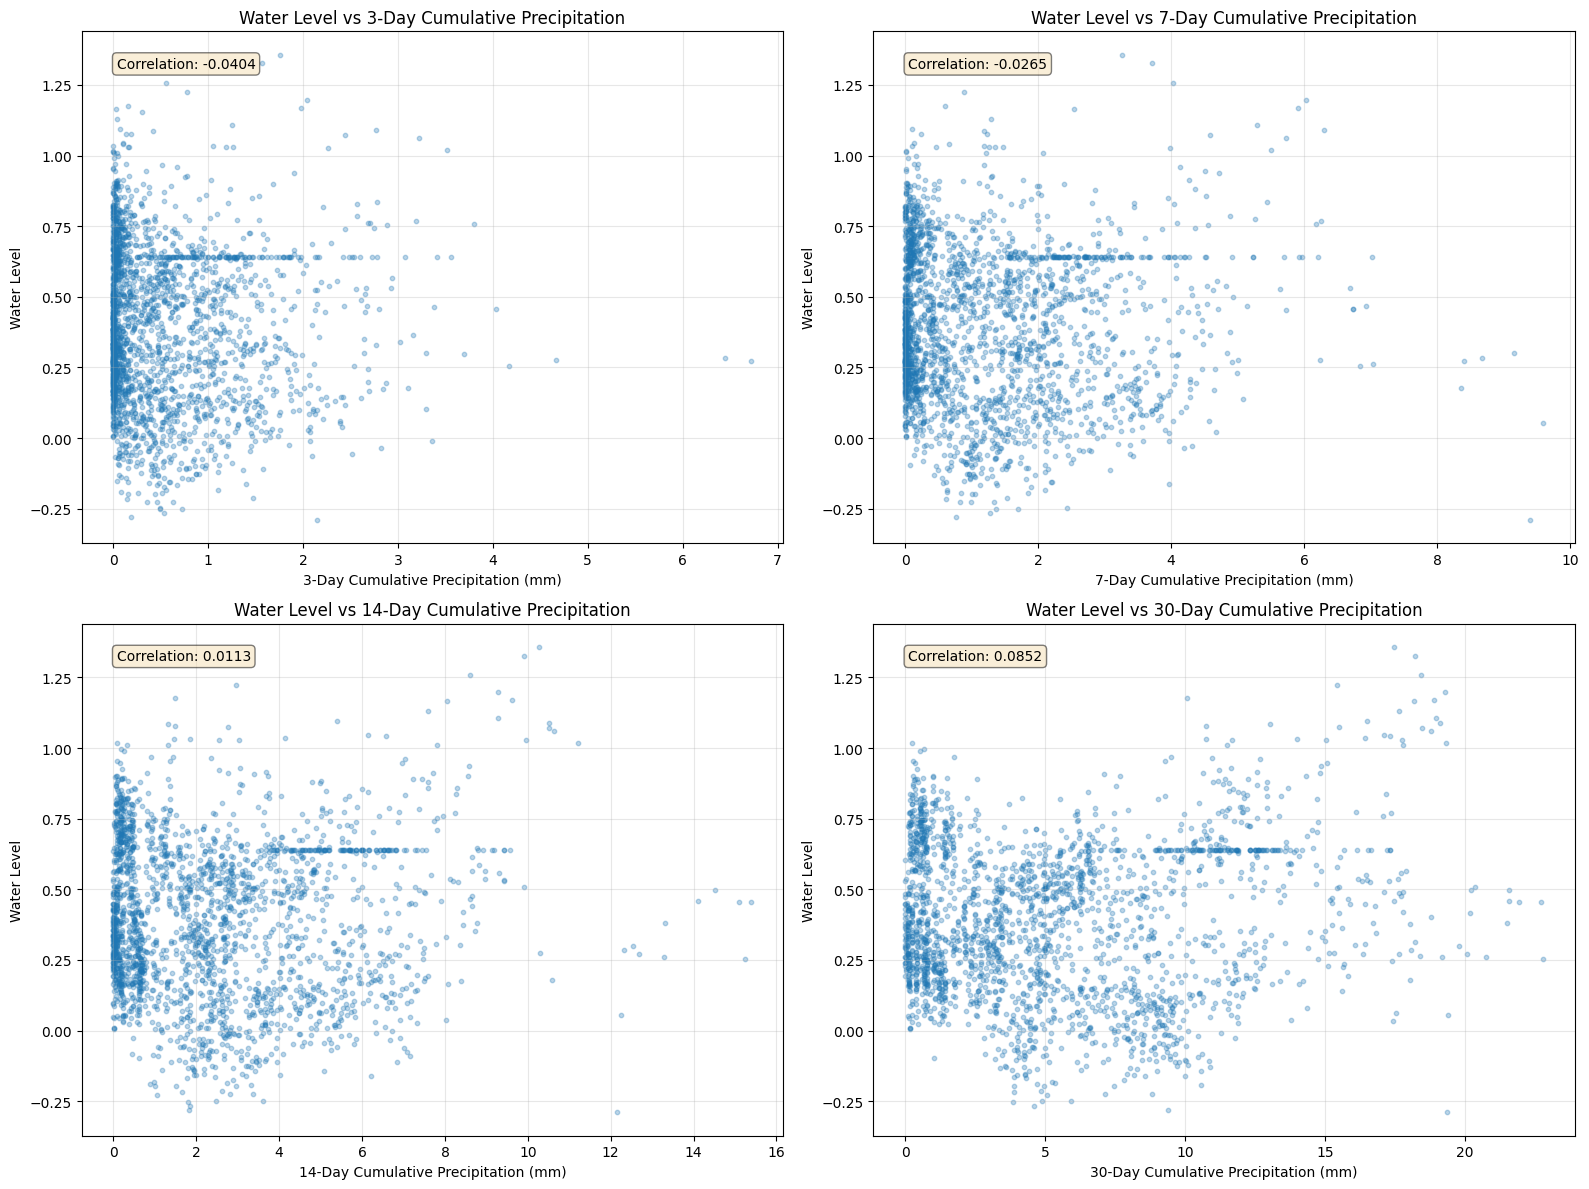


Cumulative Precipitation Correlation Summary:
3-day cumulative precipitation: -0.0404
7-day cumulative precipitation: -0.0265
14-day cumulative precipitation: 0.0113
30-day cumulative precipitation: 0.0852


In [ ]:
# Calculate cumulative precipitation over different windows
if 'precipitation' in df_daily.columns:
    cumulative_windows = [3, 7, 14, 30]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.ravel()
    
    for idx, window in enumerate(cumulative_windows):
        # Calculate cumulative precipitation
        df_daily[f'precip_cum_{window}d'] = df_daily['precipitation'].rolling(window=window).sum()
        
        # Scatter plot
        axes[idx].scatter(df_daily[f'precip_cum_{window}d'], 
                         df_daily['water_level'], 
                         alpha=0.3, s=10)
        axes[idx].set_xlabel(f'{window}-Day Cumulative Precipitation (mm)')
        axes[idx].set_ylabel('Water Level')
        axes[idx].set_title(f'Water Level vs {window}-Day Cumulative Precipitation')
        axes[idx].grid(True, alpha=0.3)
        
        # Calculate correlation
        corr = df_daily['water_level'].corr(df_daily[f'precip_cum_{window}d'])
        axes[idx].text(0.05, 0.95, f'Correlation: {corr:.4f}',
                      transform=axes[idx].transAxes,
                      verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    # Print correlation summary
    print("\nCumulative Precipitation Correlation Summary:")
    for window in cumulative_windows:
        corr = df_daily['water_level'].corr(df_daily[f'precip_cum_{window}d'])
        print(f"{window}-day cumulative precipitation: {corr:.4f}")

## 10. Feature Correlation Matrix (Advanced)

Create a detailed correlation matrix focusing on the most relevant features for water level prediction.

Top 20 Features Correlated with Water Level:
water_level                   1.000000
river_discharge               0.314473
pressure_msl                  0.290547
surface_pressure              0.290547
precip_cum_30d                0.085155
precip_cum_14d                0.011255
relative_humidity_2m         -0.013408
precip_cum_7d                -0.026520
precip_cum_3d                -0.040413
precipitation                -0.042230
rain                         -0.042230
weather_code                 -0.054362
et0_fao_evapotranspiration   -0.085394
wind_speed_10m               -0.095501
dew_point_2m                 -0.111454
wind_gusts_10m               -0.125576
cloud_cover                  -0.143671
temperature_2m               -0.156011
wind_direction_10m           -0.229997
showers                            NaN
Name: water_level, dtype: float64


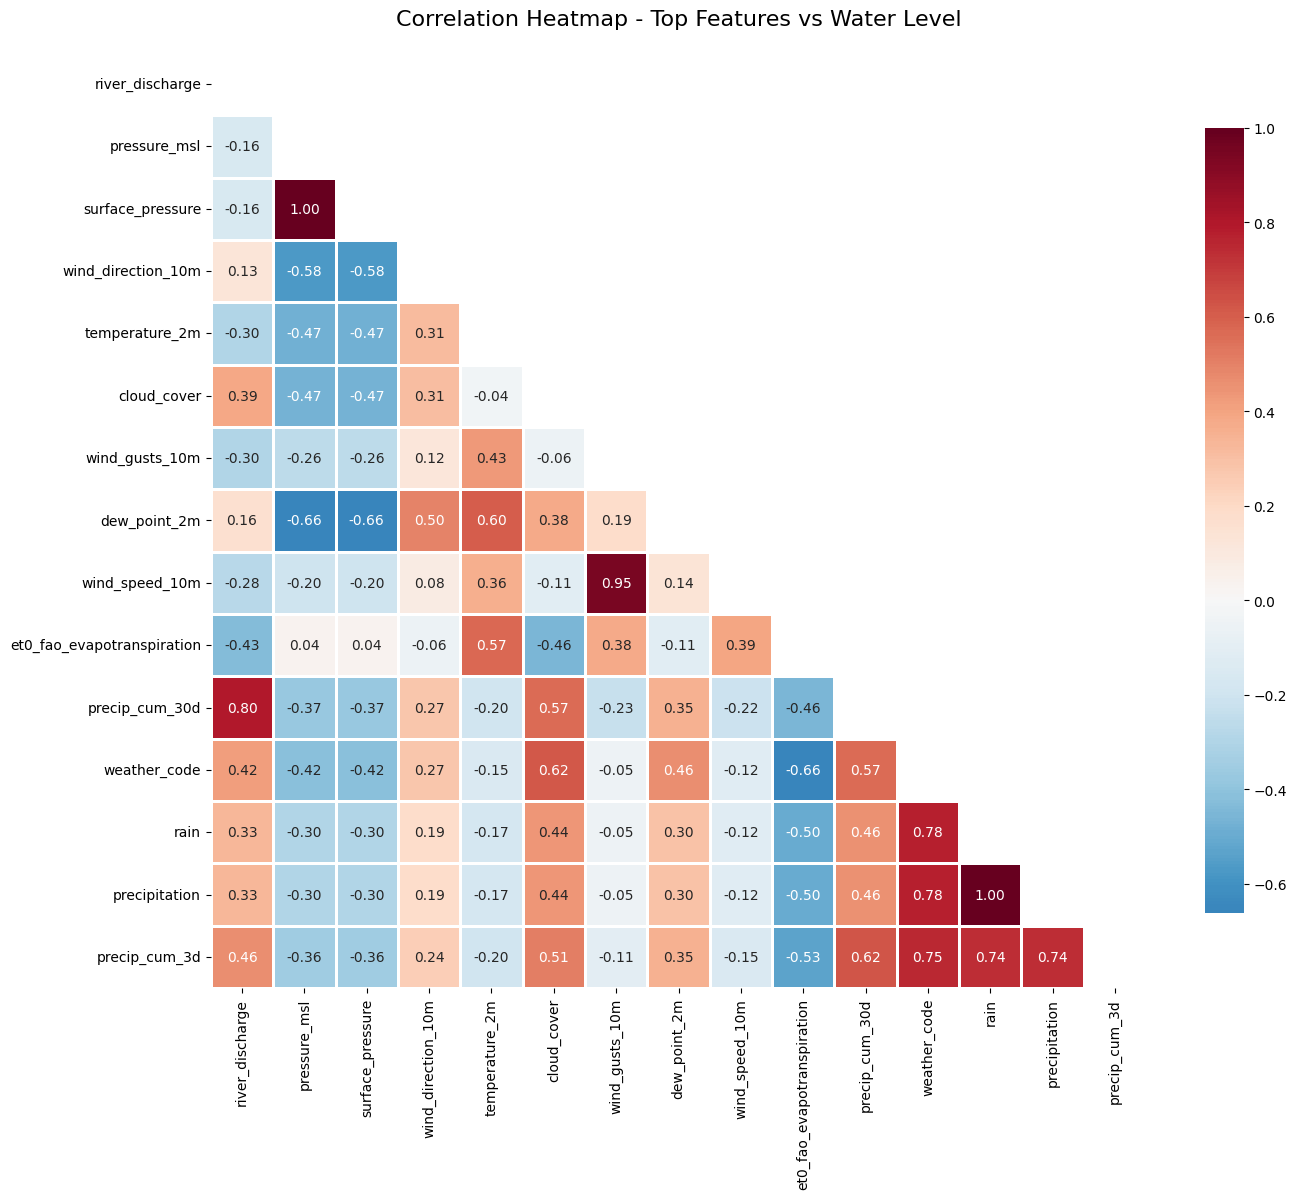



Highly Correlated Feature Pairs (|correlation| > 0.7):
         Feature 1         Feature 2  Correlation
1     pressure_msl  surface_pressure     1.000000
6             rain     precipitation     1.000000
2   wind_gusts_10m    wind_speed_10m     0.946553
0  river_discharge    precip_cum_30d     0.803846
3     weather_code              rain     0.775821
4     weather_code     precipitation     0.775821
5     weather_code     precip_cum_3d     0.747334
7             rain     precip_cum_3d     0.740250
8    precipitation     precip_cum_3d     0.740250


In [ ]:
# Get correlations with water level using only numeric columns to avoid string categories (e.g., 'No Rain')
numeric_df = df_daily.select_dtypes(include=[np.number]).copy()

if 'water_level' not in numeric_df.columns:
    raise KeyError("water_level column not found among numeric columns in df_daily")

correlations = numeric_df.corr()['water_level'].sort_values(ascending=False)
print("Top 20 Features Correlated with Water Level:")
print(correlations.head(20))

# Select top correlated features for detailed heatmap (exclude water_level itself)
top_features = correlations.abs().sort_values(ascending=False).head(16).index.tolist()
top_features = [f for f in top_features if f != 'water_level']  # ensure target not included

# Create correlation matrix for top features (only numeric)
feature_corr_matrix = numeric_df[top_features].corr()

# Plot enhanced correlation heatmap if we have at least 2 features
if feature_corr_matrix.shape[0] >= 2:
    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(feature_corr_matrix, dtype=bool))
    sns.heatmap(feature_corr_matrix, 
                mask=mask,
                annot=True, 
                fmt=".2f", 
                cmap='RdBu_r',
                center=0,
                square=True,
                linewidths=1,
                cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap - Top Features vs Water Level', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric features to plot a correlation heatmap.")

# Identify highly correlated feature pairs (potential multicollinearity)
print("\n\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
high_corr_pairs = []
cols = feature_corr_matrix.columns.tolist()
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        val = feature_corr_matrix.iloc[i, j]
        if abs(val) > 0.7:
            high_corr_pairs.append({
                'Feature 1': cols[i],
                'Feature 2': cols[j],
                'Correlation': val
            })

high_corr_df = pd.DataFrame(high_corr_pairs)
if not high_corr_df.empty:
    high_corr_df = high_corr_df.sort_values('Correlation', key=abs, ascending=False)
print(high_corr_df)

## 11. Year-over-Year Comparison

Compare water levels across different years to identify trends and anomalies.

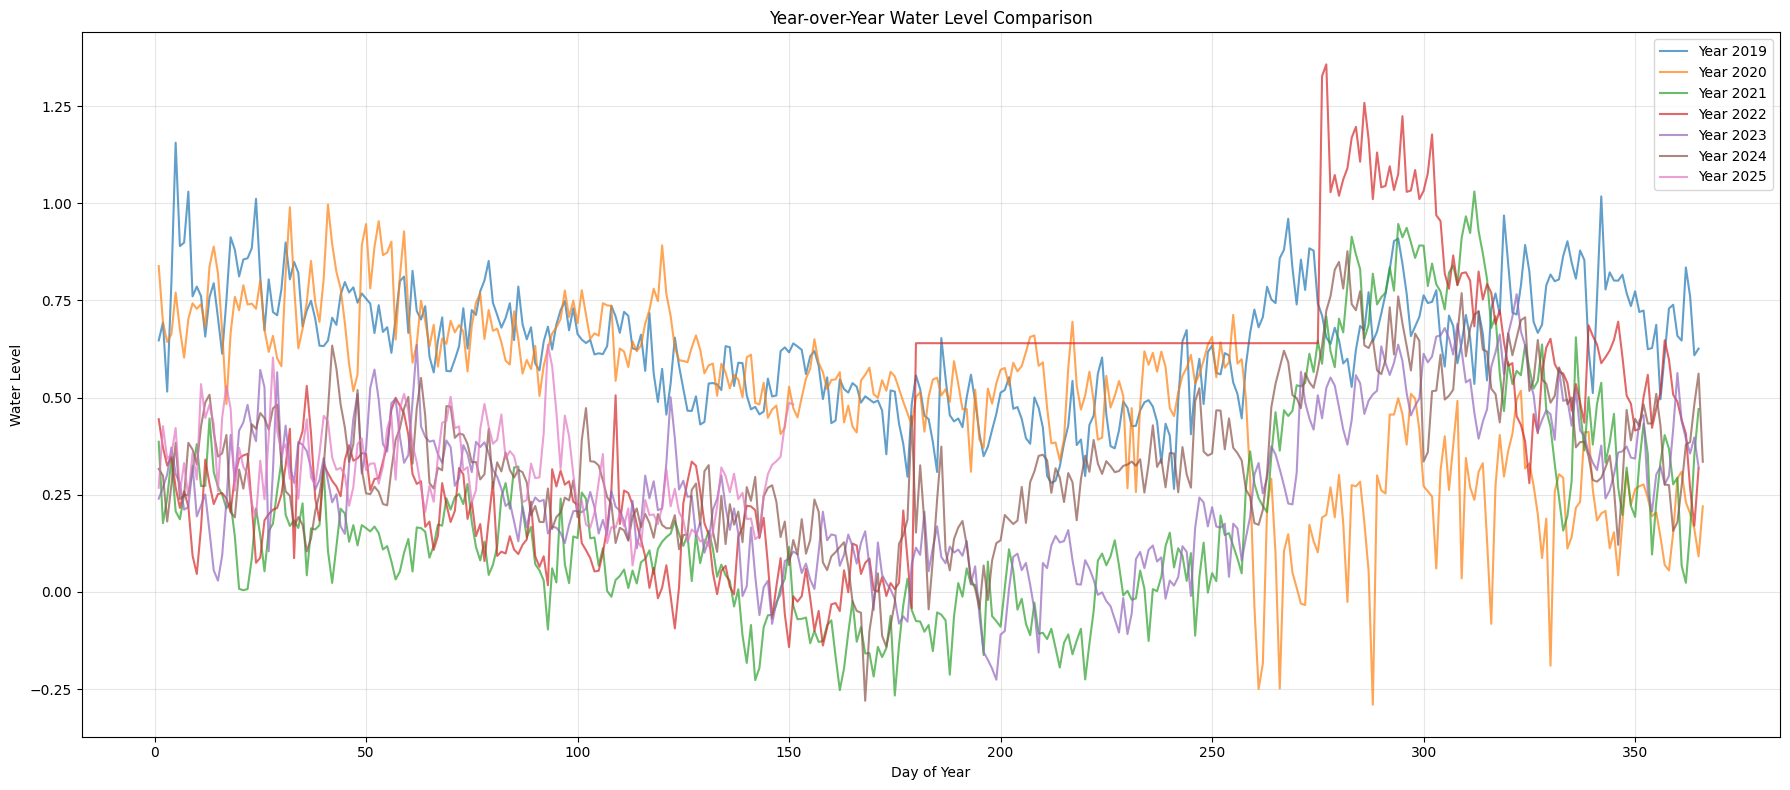


Annual Water Level Statistics:
       mean  median    std    min    max
year                                    
2019  0.637   0.647  0.151  0.265  1.156
2020  0.496   0.545  0.230 -0.290  0.997
2021  0.204   0.140  0.286 -0.266  1.030
2022  0.438   0.430  0.311 -0.142  1.357
2023  0.262   0.243  0.198 -0.226  0.766
2024  0.334   0.317  0.189 -0.280  0.877
2025  0.314   0.313  0.112  0.068  0.636


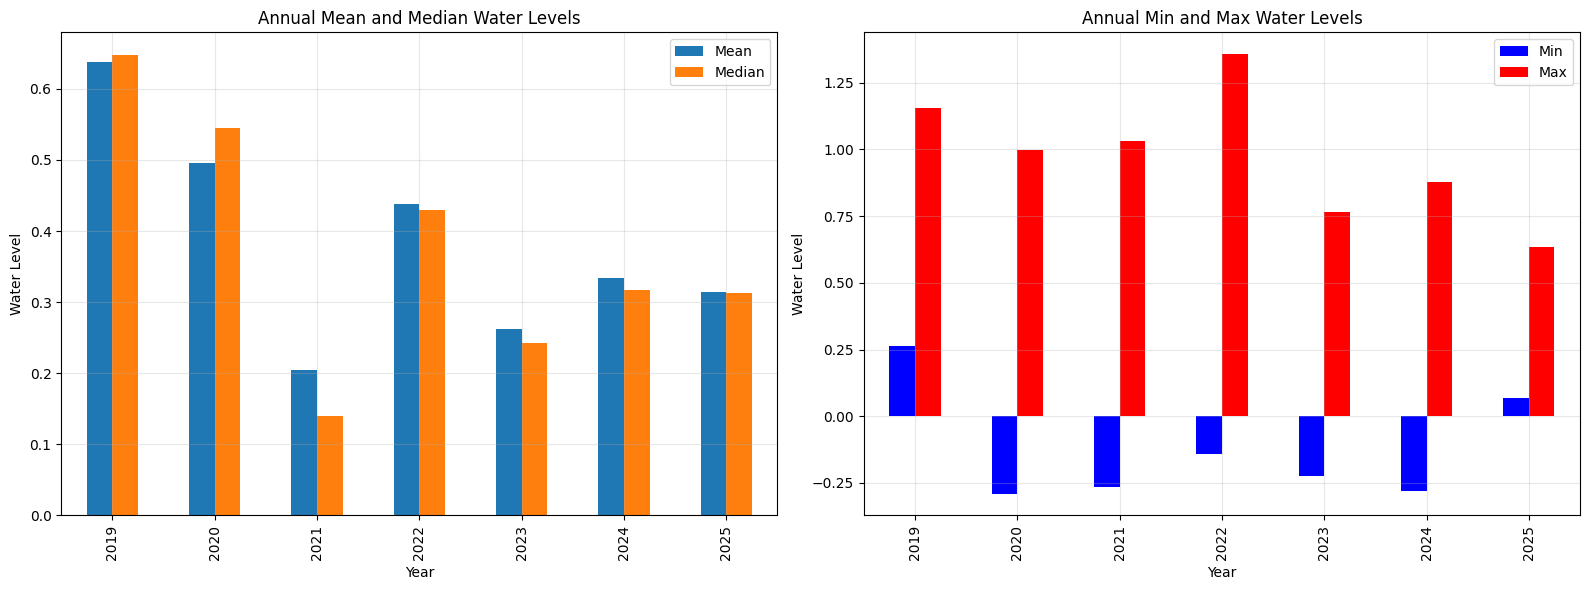

In [ ]:
# Year-over-Year comparison
df_daily['year'] = df_daily.index.year
df_daily['day_of_year'] = df_daily.index.dayofyear

# Plot water levels by year
plt.figure(figsize=(18, 8))
for year in sorted(df_daily['year'].unique()):
    year_data = df_daily[df_daily['year'] == year]
    plt.plot(year_data['day_of_year'], year_data['water_level'], 
             label=f'Year {year}', alpha=0.7, linewidth=1.5)

plt.xlabel('Day of Year')
plt.ylabel('Water Level')
plt.title('Year-over-Year Water Level Comparison')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Annual statistics
annual_stats = df_daily.groupby('year')['water_level'].agg([
    'mean', 'median', 'std', 'min', 'max'
]).round(3)

print("\nAnnual Water Level Statistics:")
print(annual_stats)

# Visualize annual statistics
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

annual_stats[['mean', 'median']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Annual Mean and Median Water Levels')
axes[0].set_ylabel('Water Level')
axes[0].set_xlabel('Year')
axes[0].legend(['Mean', 'Median'])
axes[0].grid(True, alpha=0.3)

annual_stats[['min', 'max']].plot(kind='bar', ax=axes[1], color=['blue', 'red'])
axes[1].set_title('Annual Min and Max Water Levels')
axes[1].set_ylabel('Water Level')
axes[1].set_xlabel('Year')
axes[1].legend(['Min', 'Max'])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Extreme Events Analysis

Identify and analyze extreme water level events (floods/droughts).

High Threshold (95th percentile): 0.812
Low Threshold (5th percentile): -0.033

Number of extreme high events: 118
Number of extreme low events: 118


/var/folders/wr/4dhn7j5j6s7gsbn883b1ws9w0000gn/T/ipykernel_96169/4045189295.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extreme_high['month'] = extreme_high.index.month
/var/folders/wr/4dhn7j5j6s7gsbn883b1ws9w0000gn/T/ipykernel_96169/4045189295.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extreme_low['month'] = extreme_low.index.month


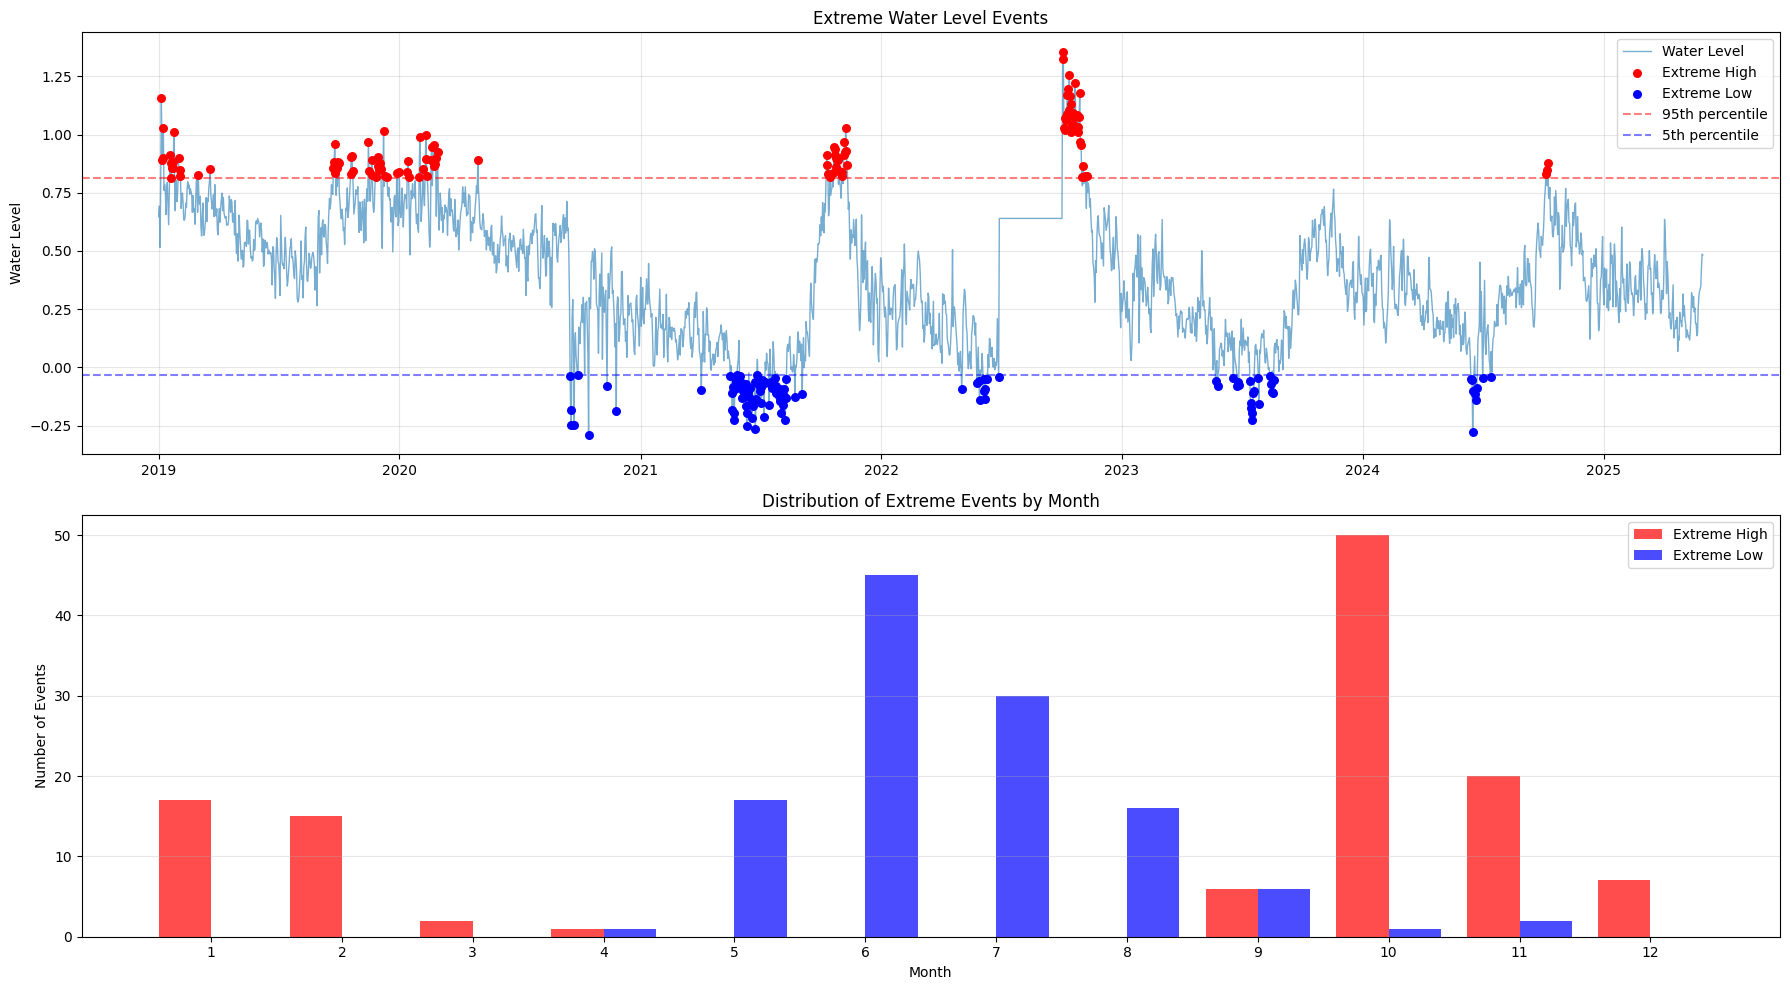



Weather Conditions During Extreme High Events:
       water_level  precipitation  temperature_2m        rain
count   118.000000     118.000000      118.000000  118.000000
mean      0.936233       0.148446       27.188489    0.148446
std       0.117807       0.290318        1.382532    0.290318
min       0.811736       0.000000       21.941667    0.000000
25%       0.849045       0.000000       26.190625    0.000000
50%       0.892222       0.016667       27.262500    0.016667
75%       1.011319       0.136458       28.272917    0.136458
max       1.357361       1.495833       29.766667    1.495833


Weather Conditions During Extreme Low Events:
       water_level  precipitation  temperature_2m        rain
count   118.000000     118.000000      118.000000  118.000000
mean     -0.111977       0.204661       29.135487    0.204661
std       0.060750       0.260320        1.306987    0.260320
min      -0.290069       0.000000       23.966667    0.000000
25%      -0.143437       0.041667  

In [ ]:
# Define extreme events thresholds
high_threshold = df_daily['water_level'].quantile(0.95)  # Top 5%
low_threshold = df_daily['water_level'].quantile(0.05)   # Bottom 5%

# Identify extreme events
extreme_high = df_daily[df_daily['water_level'] > high_threshold]
extreme_low = df_daily[df_daily['water_level'] < low_threshold]

print(f"High Threshold (95th percentile): {high_threshold:.3f}")
print(f"Low Threshold (5th percentile): {low_threshold:.3f}")
print(f"\nNumber of extreme high events: {len(extreme_high)}")
print(f"Number of extreme low events: {len(extreme_low)}")

# Visualize extreme events
fig, axes = plt.subplots(2, 1, figsize=(18, 10))

# Plot 1: Time series with extreme events highlighted
axes[0].plot(df_daily.index, df_daily['water_level'], 
             label='Water Level', alpha=0.6, linewidth=1)
axes[0].scatter(extreme_high.index, extreme_high['water_level'], 
                color='red', s=30, label='Extreme High', zorder=5)
axes[0].scatter(extreme_low.index, extreme_low['water_level'], 
                color='blue', s=30, label='Extreme Low', zorder=5)
axes[0].axhline(y=high_threshold, color='red', linestyle='--', 
                alpha=0.5, label=f'95th percentile')
axes[0].axhline(y=low_threshold, color='blue', linestyle='--', 
                alpha=0.5, label=f'5th percentile')
axes[0].set_ylabel('Water Level')
axes[0].set_title('Extreme Water Level Events')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Monthly distribution of extreme events
extreme_high['month'] = extreme_high.index.month
extreme_low['month'] = extreme_low.index.month

monthly_extreme_high = extreme_high.groupby('month').size()
monthly_extreme_low = extreme_low.groupby('month').size()

months = range(1, 13)
axes[1].bar([m - 0.2 for m in months], 
            [monthly_extreme_high.get(m, 0) for m in months],
            width=0.4, label='Extreme High', color='red', alpha=0.7)
axes[1].bar([m + 0.2 for m in months], 
            [monthly_extreme_low.get(m, 0) for m in months],
            width=0.4, label='Extreme Low', color='blue', alpha=0.7)
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Events')
axes[1].set_title('Distribution of Extreme Events by Month')
axes[1].set_xticks(months)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Analyze weather conditions during extreme events
if 'precipitation' in df_daily.columns:
    print("\n\nWeather Conditions During Extreme High Events:")
    print(extreme_high[['water_level', 'precipitation', 'temperature_2m', 
                        'rain']].describe())
    
    print("\n\nWeather Conditions During Extreme Low Events:")
    print(extreme_low[['water_level', 'precipitation', 'temperature_2m', 
                       'rain']].describe())

## 13. Key Insights Summary

Summarize the key findings from the exploratory data analysis.

In [ ]:
# Create a comprehensive summary report
print("=" * 80)
print("EXPLORATORY DATA ANALYSIS - KEY INSIGHTS SUMMARY")
print("=" * 80)

print("\n1. DATASET OVERVIEW")
print(f"   - Total observations: {len(df_daily):,}")
print(f"   - Time period: {df_daily.index.min()} to {df_daily.index.max()}")
print(f"   - Number of features: {len(df_daily.columns)}")

print("\n2. WATER LEVEL STATISTICS")
print(f"   - Mean: {df_daily['water_level'].mean():.3f}")
print(f"   - Median: {df_daily['water_level'].median():.3f}")
print(f"   - Std Dev: {df_daily['water_level'].std():.3f}")
print(f"   - Range: [{df_daily['water_level'].min():.3f}, {df_daily['water_level'].max():.3f}]")

print("\n3. DATA QUALITY")
missing_summary = df_daily.isnull().sum()
if missing_summary.sum() > 0:
    print(f"   - Features with missing data: {(missing_summary > 0).sum()}")
    print(f"   - Total missing values: {missing_summary.sum()}")
else:
    print("   - No missing data detected ✓")

print("\n4. TOP CORRELATIONS WITH WATER LEVEL")
top_5_features = correlations.abs().sort_values(ascending=False).head(6)[1:]
for feature in top_5_features.index:
    print(f"   - {feature}: {correlations[feature]:.4f}")

print("\n5. TEMPORAL PATTERNS")
# Compute monthly averages; use index month if 'month' column is not present
if 'month' in df_daily.columns:
    monthly_avg = df_daily.groupby('month')['water_level'].mean()
else:
    monthly_avg = df_daily.groupby(df_daily.index.month)['water_level'].mean()

max_month = monthly_avg.idxmax()
min_month = monthly_avg.idxmin()
print(f"   - Highest water levels: Month {max_month} (avg: {monthly_avg.max():.3f})")
print(f"   - Lowest water levels: Month {min_month} (avg: {monthly_avg.min():.3f})")

print("\n6. EXTREME EVENTS")
print(f"   - Extreme high events (>95th percentile): {len(extreme_high)} ({len(extreme_high)/len(df_daily)*100:.2f}%)")
print(f"   - Extreme low events (<5th percentile): {len(extreme_low)} ({len(extreme_low)/len(df_daily)*100:.2f}%)")

print("\n" + "=" * 80)
print("Analysis complete! Use these insights for feature engineering and modeling.")
print("=" * 80)

EXPLORATORY DATA ANALYSIS - KEY INSIGHTS SUMMARY

1. DATASET OVERVIEW
   - Total observations: 2,343
   - Time period: 2019-01-01 00:00:00 to 2025-05-31 00:00:00
   - Number of features: 23

2. WATER LEVEL STATISTICS
   - Mean: 0.390
   - Median: 0.379
   - Std Dev: 0.269
   - Range: [-0.290, 1.357]

3. DATA QUALITY
   - Features with missing data: 4
   - Total missing values: 50

4. TOP CORRELATIONS WITH WATER LEVEL
   - river_discharge: 0.3145
   - pressure_msl: 0.2905
   - surface_pressure: 0.2905
   - wind_direction_10m: -0.2300
   - temperature_2m: -0.1560

5. TEMPORAL PATTERNS
   - Highest water levels: Month 10 (avg: 0.667)
   - Lowest water levels: Month 6 (avg: 0.184)

6. EXTREME EVENTS
   - Extreme high events (>95th percentile): 118 (5.04%)
   - Extreme low events (<5th percentile): 118 (5.04%)

Analysis complete! Use these insights for feature engineering and modeling.


In [ ]:
# Plot distribution of water level
